In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# open spec2006-simpoint-weighted-stats-cryocorecryocache.csv
df1 = pd.read_csv("spec2006-simpoint-weighted-stats-cryocorecryocache.csv")
# open spec2006-simpoint-weighted-stats-supercorecryocache.csv
df2 = pd.read_csv("spec2006-simpoint-weighted-stats-supercorecryocache.csv")
# open spec2006-simpoint-weighted-stats-supercoresupercache.csv
df3 = pd.read_csv("spec2006-simpoint-weighted-stats-supercoresupercache.csv")

# rename Unnamed: 0 to Benchmark
df1.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df2.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df3.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)

# all columns append with _cryocorecryocache except Benchmark
df1.columns = [str(col) + '_cryocorecryocache' if col != 'Benchmark' else col for col in df1.columns]
# all columns append with _supercorecryocache except Benchmark
df2.columns = [str(col) + '_supercorecryocache' if col != 'Benchmark' else col for col in df2.columns]
# all columns append with _supercoresupercache except Benchmark
df3.columns = [str(col) + '_supercoresupercache' if col != 'Benchmark' else col for col in df3.columns]

# merge df1 and df2 on Benchmark
df = pd.merge(df1, df2, on='Benchmark')
# merge df and df3 on Benchmark
df = pd.merge(df, df3, on='Benchmark')

print(df.columns)

Index(['Benchmark', 'weightedCycle_cryocorecryocache',
       'weightedInstructions_cryocorecryocache',
       'weightedSeconds_cryocorecryocache',
       'weightedL1D Accesses_cryocorecryocache',
       'weightedL1I Accesses_cryocorecryocache',
       'weightedL2 Accesses_cryocorecryocache',
       'weightedL3 Accesses_cryocorecryocache',
       'weightedL3 Misses_cryocorecryocache',
       'weightedCycle_supercorecryocache',
       'weightedInstructions_supercorecryocache',
       'weightedSeconds_supercorecryocache',
       'weightedL1D Accesses_supercorecryocache',
       'weightedL1I Accesses_supercorecryocache',
       'weightedL2 Accesses_supercorecryocache',
       'weightedL3 Accesses_supercorecryocache',
       'weightedL3 Misses_supercorecryocache',
       'weightedIssued Instructions_supercorecryocache',
       'weightedMemory Instructions_supercorecryocache',
       '%Memory Instructions_supercorecryocache',
       'weightedCycle_supercoresupercache',
       'weightedInstr

In [4]:
def add_bandwidths(df):
    df['L1D_cache_bandwidth_cryocorecryocache'] = df['weightedL1D Accesses_cryocorecryocache'] * 8 / df['weightedSeconds_cryocorecryocache']
    df['L1D_cache_bandwidth_supercorecryocache'] = df['weightedL1D Accesses_supercorecryocache'] * 8 / df['weightedSeconds_supercorecryocache']
    df['L1D_cache_bandwidth_supercoresupercache'] = df['weightedL1D Accesses_supercoresupercache'] * 8 / df['weightedSeconds_supercoresupercache']

    df['L1I_cache_bandwidth_cryocorecryocache'] = df['weightedL1I Accesses_cryocorecryocache'] * 8 / df['weightedSeconds_cryocorecryocache']
    df['L1I_cache_bandwidth_supercorecryocache'] = df['weightedL1I Accesses_supercorecryocache'] * 8 / df['weightedSeconds_supercorecryocache']
    df['L1I_cache_bandwidth_supercoresupercache'] = df['weightedL1I Accesses_supercoresupercache'] * 8 / df['weightedSeconds_supercoresupercache']

    df['L2_cache_bandwidth_cryocorecryocache'] = df['weightedL2 Accesses_cryocorecryocache'] * 64 / df['weightedSeconds_cryocorecryocache']
    df['L2_cache_bandwidth_supercorecryocache'] = df['weightedL2 Accesses_supercorecryocache'] * 64 / df['weightedSeconds_supercorecryocache']
    df['L2_cache_bandwidth_supercoresupercache'] = df['weightedL2 Accesses_supercoresupercache'] * 64 / df['weightedSeconds_supercoresupercache']

    df['L3_cache_bandwidth_cryocorecryocache'] = df['weightedL3 Accesses_cryocorecryocache'] * 64 / df['weightedSeconds_cryocorecryocache']
    df['L3_cache_bandwidth_supercorecryocache'] = df['weightedL3 Accesses_supercorecryocache'] * 64 / df['weightedSeconds_supercorecryocache']
    df['L3_cache_bandwidth_supercoresupercache'] = df['weightedL3 Accesses_supercoresupercache'] * 64 / df['weightedSeconds_supercoresupercache']

    df['L1D_cache_bandwidth_cryocorecryocache'] *= 10e-9
    df['L1D_cache_bandwidth_supercorecryocache'] *= 10e-9
    df['L1D_cache_bandwidth_supercoresupercache'] *= 10e-9

    df['L1I_cache_bandwidth_cryocorecryocache'] *= 10e-9
    df['L1I_cache_bandwidth_supercorecryocache'] *= 10e-9
    df['L1I_cache_bandwidth_supercoresupercache'] *= 10e-9

    df['L2_cache_bandwidth_cryocorecryocache'] *= 10e-9
    df['L2_cache_bandwidth_supercorecryocache'] *= 10e-9
    df['L2_cache_bandwidth_supercoresupercache'] *= 10e-9

    df['L3_cache_bandwidth_cryocorecryocache'] *= 10e-9
    df['L3_cache_bandwidth_supercorecryocache'] *= 10e-9
    df['L3_cache_bandwidth_supercoresupercache'] *= 10e-9

    df['IPC_cryocorecryocache'] = df['weightedInstructions_cryocorecryocache'] / df['weightedCycle_cryocorecryocache']
    df['IPC_supercorecryocache'] = df['weightedInstructions_supercorecryocache'] / df['weightedCycle_supercorecryocache']
    df['IPC_supercoresupercache'] = df['weightedInstructions_supercoresupercache'] / df['weightedCycle_supercoresupercache']

    df['Total_cache_bandwidth_cryocorecryocache'] = df['L1D_cache_bandwidth_cryocorecryocache'] + df['L1I_cache_bandwidth_cryocorecryocache'] + df['L2_cache_bandwidth_cryocorecryocache'] + df['L3_cache_bandwidth_cryocorecryocache']
    df['Total_cache_bandwidth_supercorecryocache'] = df['L1D_cache_bandwidth_supercorecryocache'] + df['L1I_cache_bandwidth_supercorecryocache'] + df['L2_cache_bandwidth_supercorecryocache'] + df['L3_cache_bandwidth_supercorecryocache']
    df['Total_cache_bandwidth_supercoresupercache'] = df['L1D_cache_bandwidth_supercoresupercache'] + df['L1I_cache_bandwidth_supercoresupercache'] + df['L2_cache_bandwidth_supercoresupercache'] + df['L3_cache_bandwidth_supercoresupercache']

    return df

In [5]:
df = add_bandwidths(df)

In [6]:
def plot(stat):
    plt.figure(figsize=(7, 3))  # Set figure size
    
    # Define width of each bar
    bar_width = 0.2
    
    # Calculate offset for each set of bars
    offset = np.arange(len(df['Benchmark']))

    print(df[['Benchmark', stat + '_supercorecryocache']])
    
    # Plot each set of bars with appropriate offset
    #plt.bar(offset - bar_width, df[stat + '_cryocorecryocache'], width=bar_width, label='CryoCore and CryoCache', color='r')
    plt.bar(offset, df[stat + '_supercorecryocache'], width=bar_width, label='SuperCore and CryoCache', color='limegreen')
    #plt.bar(offset + bar_width, df[stat + '_supercoresupercache'], width=bar_width, label='SuperCore and SuperCache', color='dodgerblue')
    
    plt.xticks(ticks=offset, labels=df['Benchmark'], rotation=45)  # Set x-axis ticks and labels
    #plt.legend(loc = (0.45, 0.5))
    # plt.title(" ".join(stat.split('_')).replace('weighted', '').title())  # Set title
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(" ".join(stat.split('_')).replace('weighted', '').title() + ".pdf")  # Save the plot as a PNG file
    plt.show()  # Display the plot

In [7]:
def speedup():
    # plot speedup

    plt.figure(figsize=(6.5, 2.75))

    # Define width of each bar
    bar_width = 0.2

    # Calculate offset for each set of bars
    offset = np.arange(len(df['Benchmark']))

    # speedup is old / new seconds
    df['speedup_supercorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercorecryocache']
    df['speedup_supercoresupercache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercoresupercache']

    # print speedup values for each benchmark
    print(df[['Benchmark', 'speedup_supercorecryocache', 'speedup_supercoresupercache']])

    # Plot each set of bars with appropriate offset
    plt.bar(offset - bar_width, df['speedup_supercorecryocache'], width=bar_width, label='SuperCore and CryoCache', color='limegreen')
    plt.bar(offset, df['speedup_supercoresupercache'], width=bar_width, label='SuperCore and SuperCache', color='dodgerblue')

    plt.xticks(ticks=offset, labels=df['Benchmark'], rotation=45, fontsize=10)  # Set x-axis ticks and labels
    plt.legend(loc=(0.45, 0.5))  # Show legend
    plt.savefig("Speedup.png")  # Save the plot as a PNG file
    # plt.title('Speedup')  # Set plot title
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot
    



     Benchmark  speedup_supercorecryocache  speedup_supercoresupercache
0        gobmk                    2.432243                    10.461336
1        astar                    1.787604                    10.931611
2       zeusmp                    1.223131                     1.729291
3        bzip2                    1.692233                    21.062424
4      omnetpp                    1.666671                     1.986075
5    perlbench                    3.877134                    18.985640
6        hmmer                    2.349557                    23.956463
7   libquantum                    1.013247                     1.200666
8     leslie3d                    1.175759                     1.558335
9          lbm                    1.155128                     1.295012
10       sjeng                    2.068265                     9.512468
11         mcf                    1.068585                     1.399420
12      bwaves                    1.218756                     1

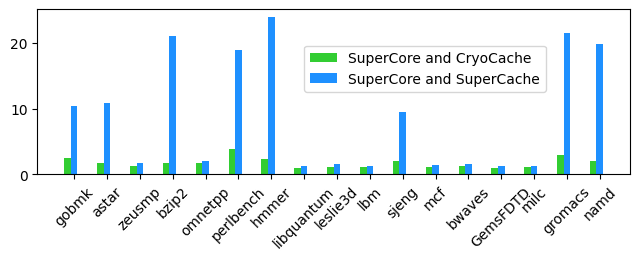

In [8]:
speedup()

     Benchmark  Total_cache_bandwidth_supercorecryocache
0        gobmk                                416.905351
1        astar                                486.052956
2       zeusmp                                286.141427
3        bzip2                                462.574941
4      omnetpp                                223.760779
5    perlbench                                432.355167
6        hmmer                                664.542161
7   libquantum                                181.846957
8     leslie3d                                258.851649
9          lbm                                258.938157
10       sjeng                                350.719937
11         mcf                                238.113654
12      bwaves                                212.108206
13    GemsFDTD                                147.957949
14        milc                                144.567038
15     gromacs                                535.020530
16        namd                 

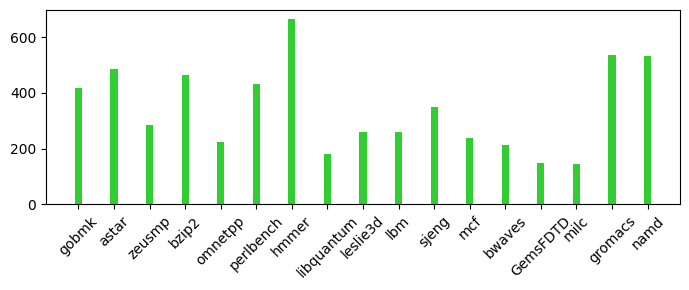

In [9]:
plot('Total_cache_bandwidth')

     Benchmark  L1D_cache_bandwidth_supercorecryocache
0        gobmk                              263.026167
1        astar                              258.174325
2       zeusmp                              131.667013
3        bzip2                              254.091944
4      omnetpp                               96.656912
5    perlbench                              266.170405
6        hmmer                              501.762379
7   libquantum                               57.813390
8     leslie3d                              109.193821
9          lbm                               52.020877
10       sjeng                              224.182877
11         mcf                               56.825132
12      bwaves                               89.903887
13    GemsFDTD                               59.737948
14        milc                               65.773622
15     gromacs                              291.848229
16        namd                              326.245837


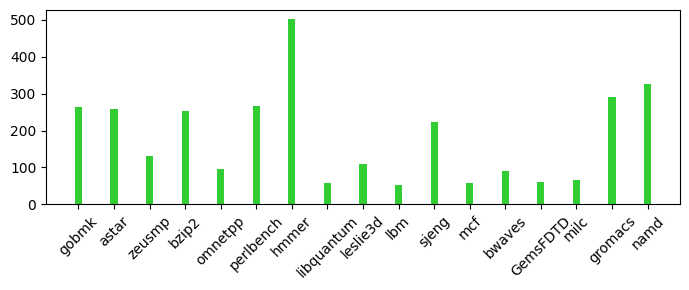

In [10]:
plot('L1D_cache_bandwidth')

     Benchmark  L1I_cache_bandwidth_supercorecryocache
0        gobmk                              118.559461
1        astar                              111.832632
2       zeusmp                               33.294672
3        bzip2                              112.917620
4      omnetpp                               53.751093
5    perlbench                              130.970280
6        hmmer                              109.635541
7   libquantum                               43.310368
8     leslie3d                               26.628837
9          lbm                               15.191014
10       sjeng                              118.232230
11         mcf                               32.690312
12      bwaves                               21.428221
13    GemsFDTD                               12.710607
14        milc                               13.428595
15     gromacs                              109.408544
16        namd                              110.304037


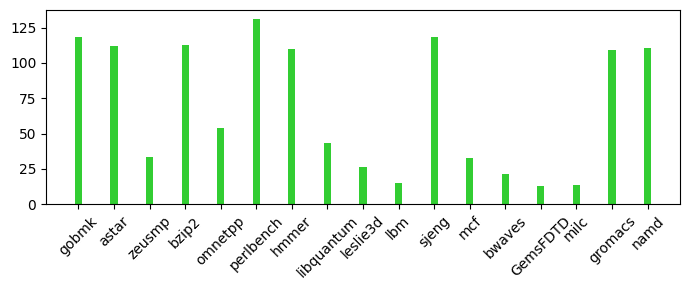

In [11]:
plot('L1I_cache_bandwidth')

     Benchmark  L2_cache_bandwidth_supercorecryocache
0        gobmk                              31.001561
1        astar                              78.351289
2       zeusmp                              97.238680
3        bzip2                              64.550698
4      omnetpp                              41.528855
5    perlbench                              30.629088
6        hmmer                              33.552746
7   libquantum                              40.362981
8     leslie3d                              74.816601
9          lbm                             119.346179
10       sjeng                               6.668337
11         mcf                              87.262328
12      bwaves                              52.928228
13    GemsFDTD                              44.056566
14        milc                              32.563009
15     gromacs                             121.726636
16        namd                              95.121591


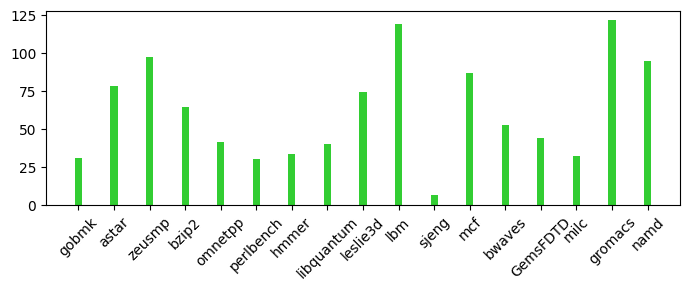

In [12]:
plot('L2_cache_bandwidth')

     Benchmark  L3_cache_bandwidth_supercorecryocache
0        gobmk                               4.318162
1        astar                              37.694709
2       zeusmp                              23.941062
3        bzip2                              31.014679
4      omnetpp                              31.823919
5    perlbench                               4.585394
6        hmmer                              19.591495
7   libquantum                              40.360219
8     leslie3d                              48.212390
9          lbm                              72.380087
10       sjeng                               1.636492
11         mcf                              61.335883
12      bwaves                              47.847870
13    GemsFDTD                              31.452827
14        milc                              32.801812
15     gromacs                              12.037121
16        namd                               1.417130


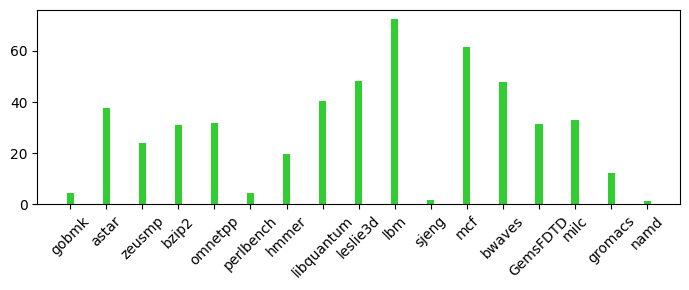

In [13]:
plot('L3_cache_bandwidth')

     Benchmark  weightedL3 Misses_supercorecryocache
0        gobmk                          6.070436e+08
1        astar                          4.418806e+08
2       zeusmp                          8.298239e+09
3        bzip2                          2.590457e+08
4      omnetpp                          3.580654e+09
5    perlbench                          1.941585e+08
6        hmmer                          6.345051e+07
7   libquantum                          4.865266e+10
8     leslie3d                          2.350512e+10
9          lbm                          2.630788e+10
10       sjeng                          7.957558e+08
11         mcf                          9.625650e+09
12      bwaves                          3.417441e+10
13    GemsFDTD                          2.117551e+10
14        milc                          2.484127e+10
15     gromacs                          7.624850e+07
16        namd                          1.310486e+08


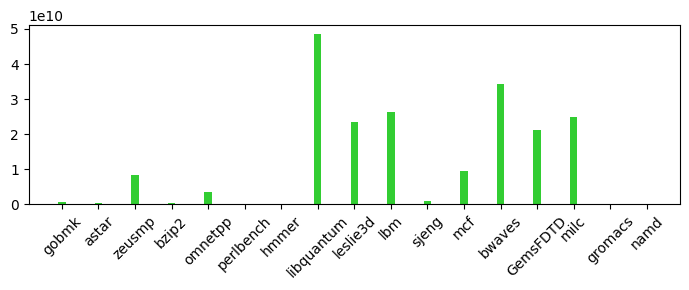

In [14]:
plot('weightedL3 Misses')

In [15]:
# open spec2006-simpoint-weighted-stats-cryocorecryocache.csv
df1 = pd.read_csv("spec2006-simpoint-weighted-stats-cryocorecryocache.csv")
# open spec2006-simpoint-weighted-stats-supercorecryocache.csv
df2 = pd.read_csv("spec2006-simpoint-weighted-stats-supercorecryocache.csv")
# open spec2006-simpoint-weighted-stats-supercoresupercache.csv
df3 = pd.read_csv("spec2006-simpoint-weighted-stats-supercoresupercache.csv")
# open spec2006-simpoint-weighted-stats-inordersupercoresupercache.csv
df4 = pd.read_csv("spec2006-simpoint-weighted-stats-inordersupercoresupercache.csv")
# open spec2006-simpoint-weighted-stats-inordersupercorecryocache.csv
df5 = pd.read_csv("spec2006-simpoint-weighted-stats-inordersupercorecryocache.csv")
# open spec2006-simpoint-weighted-stats-inordercryocorecryocache.csv
df6 = pd.read_csv("spec2006-simpoint-weighted-stats-inordercryocorecryocache.csv")

# rename Unnamed: 0 to Benchmark
df1.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df2.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df3.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df4.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df5.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df6.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)

# all columns append with _cryocorecryocache except Benchmark
df1.columns = [str(col) + '_cryocorecryocache' if col != 'Benchmark' else col for col in df1.columns]
# all columns append with _supercorecryocache except Benchmark
df2.columns = [str(col) + '_supercorecryocache' if col != 'Benchmark' else col for col in df2.columns]
# all columns append with _supercoresupercache except Benchmark
df3.columns = [str(col) + '_supercoresupercache' if col != 'Benchmark' else col for col in df3.columns]
# all columns append with _inordersupercoresupercache except Benchmark
df4.columns = [str(col) + '_inordersupercoresupercache' if col != 'Benchmark' else col for col in df4.columns]
# all columns append with _inordersupercorecryocache except Benchmark
df5.columns = [str(col) + '_inordersupercorecryocache' if col != 'Benchmark' else col for col in df5.columns]
# all columns append with _inordercryocorecryocache except Benchmark
df6.columns = [str(col) + '_inordercryocorecryocache' if col != 'Benchmark' else col for col in df6.columns]

# merge df1 and df2 on Benchmark
df = pd.merge(df1, df2, on='Benchmark')
# merge df and df3 on Benchmark
df = pd.merge(df, df3, on='Benchmark')
# merge df and df4 on Benchmark
df = pd.merge(df, df4, on='Benchmark')
# merge df and df5 on Benchmark
df = pd.merge(df, df5, on='Benchmark')
# merge df and df6 on Benchmark
df = pd.merge(df, df6, on='Benchmark')

print(df.columns)

Index(['Benchmark', 'weightedCycle_cryocorecryocache',
       'weightedInstructions_cryocorecryocache',
       'weightedSeconds_cryocorecryocache',
       'weightedL1D Accesses_cryocorecryocache',
       'weightedL1I Accesses_cryocorecryocache',
       'weightedL2 Accesses_cryocorecryocache',
       'weightedL3 Accesses_cryocorecryocache',
       'weightedL3 Misses_cryocorecryocache',
       'weightedCycle_supercorecryocache',
       'weightedInstructions_supercorecryocache',
       'weightedSeconds_supercorecryocache',
       'weightedL1D Accesses_supercorecryocache',
       'weightedL1I Accesses_supercorecryocache',
       'weightedL2 Accesses_supercorecryocache',
       'weightedL3 Accesses_supercorecryocache',
       'weightedL3 Misses_supercorecryocache',
       'weightedIssued Instructions_supercorecryocache',
       'weightedMemory Instructions_supercorecryocache',
       '%Memory Instructions_supercorecryocache',
       'weightedCycle_supercoresupercache',
       'weightedInstr

In [16]:
df['L1D_cache_bandwidth_cryocorecryocache'] = df['weightedL1D Accesses_cryocorecryocache'] * 8 / df['weightedSeconds_cryocorecryocache']
df['L1D_cache_bandwidth_supercorecryocache'] = df['weightedL1D Accesses_supercorecryocache'] * 8 / df['weightedSeconds_supercorecryocache']
df['L1D_cache_bandwidth_supercoresupercache'] = df['weightedL1D Accesses_supercoresupercache'] * 8 / df['weightedSeconds_supercoresupercache']
df['L1D_cache_bandwidth_inordersupercoresupercache'] = df['weightedL1D Accesses_inordersupercoresupercache'] * 8 / df['weightedSeconds_inordersupercoresupercache']
df['L1D_cache_bandwidth_inordersupercorecryocache'] = df['weightedL1D Accesses_inordersupercorecryocache'] * 8 / df['weightedSeconds_inordersupercorecryocache']
df['L1D_cache_bandwidth_inordercryocorecryocache'] = df['weightedL1D Accesses_inordercryocorecryocache'] * 8 / df['weightedSeconds_inordercryocorecryocache']

df['L1I_cache_bandwidth_cryocorecryocache'] = df['weightedL1I Accesses_cryocorecryocache'] * 8 / df['weightedSeconds_cryocorecryocache']
df['L1I_cache_bandwidth_supercorecryocache'] = df['weightedL1I Accesses_supercorecryocache'] * 8 / df['weightedSeconds_supercorecryocache']
df['L1I_cache_bandwidth_supercoresupercache'] = df['weightedL1I Accesses_supercoresupercache'] * 8 / df['weightedSeconds_supercoresupercache']
df['L1I_cache_bandwidth_inordersupercoresupercache'] = df['weightedL1I Accesses_inordersupercoresupercache'] * 8 / df['weightedSeconds_inordersupercoresupercache']
df['L1I_cache_bandwidth_inordersupercorecryocache'] = df['weightedL1I Accesses_inordersupercorecryocache'] * 8 / df['weightedSeconds_inordersupercorecryocache']
df['L1I_cache_bandwidth_inordercryocorecryocache'] = df['weightedL1I Accesses_inordercryocorecryocache'] * 8 / df['weightedSeconds_inordercryocorecryocache']

df['L2_cache_bandwidth_cryocorecryocache'] = df['weightedL2 Accesses_cryocorecryocache'] * 64 / df['weightedSeconds_cryocorecryocache']
df['L2_cache_bandwidth_supercorecryocache'] = df['weightedL2 Accesses_supercorecryocache'] * 64 / df['weightedSeconds_supercorecryocache']
df['L2_cache_bandwidth_supercoresupercache'] = df['weightedL2 Accesses_supercoresupercache'] * 64 / df['weightedSeconds_supercoresupercache']
df['L2_cache_bandwidth_inordersupercoresupercache'] = df['weightedL2 Accesses_inordersupercoresupercache'] * 64 / df['weightedSeconds_inordersupercoresupercache']
df['L2_cache_bandwidth_inordersupercorecryocache'] = df['weightedL2 Accesses_inordersupercorecryocache'] * 64 / df['weightedSeconds_inordersupercorecryocache']
df['L2_cache_bandwidth_inordercryocorecryocache'] = df['weightedL2 Accesses_inordercryocorecryocache'] * 64 / df['weightedSeconds_inordercryocorecryocache']

df['L3_cache_bandwidth_cryocorecryocache'] = df['weightedL3 Accesses_cryocorecryocache'] * 64 / df['weightedSeconds_cryocorecryocache']
df['L3_cache_bandwidth_supercorecryocache'] = df['weightedL3 Accesses_supercorecryocache'] * 64 / df['weightedSeconds_supercorecryocache']
df['L3_cache_bandwidth_supercoresupercache'] = df['weightedL3 Accesses_supercoresupercache'] * 64 / df['weightedSeconds_supercoresupercache']
df['L3_cache_bandwidth_inordersupercoresupercache'] = df['weightedL3 Accesses_inordersupercoresupercache'] * 64 / df['weightedSeconds_inordersupercoresupercache']
df['L3_cache_bandwidth_inordersupercorecryocache'] = df['weightedL3 Accesses_inordersupercorecryocache'] * 64 / df['weightedSeconds_inordersupercorecryocache']
df['L3_cache_bandwidth_inordercryocorecryocache'] = df['weightedL3 Accesses_inordercryocorecryocache'] * 64 / df['weightedSeconds_inordercryocorecryocache']

df['L1D_cache_bandwidth_cryocorecryocache'] *= 10e-9
df['L1D_cache_bandwidth_supercorecryocache'] *= 10e-9
df['L1D_cache_bandwidth_supercoresupercache'] *= 10e-9
df['L1D_cache_bandwidth_inordersupercoresupercache'] *= 10e-9
df['L1D_cache_bandwidth_inordersupercorecryocache'] *= 10e-9
df['L1D_cache_bandwidth_inordercryocorecryocache'] *= 10e-9

df['L1I_cache_bandwidth_cryocorecryocache'] *= 10e-9
df['L1I_cache_bandwidth_supercorecryocache'] *= 10e-9
df['L1I_cache_bandwidth_supercoresupercache'] *= 10e-9
df['L1I_cache_bandwidth_inordersupercoresupercache'] *= 10e-9
df['L1I_cache_bandwidth_inordersupercorecryocache'] *= 10e-9
df['L1I_cache_bandwidth_inordercryocorecryocache'] *= 10e-9

df['L2_cache_bandwidth_cryocorecryocache'] *= 10e-9
df['L2_cache_bandwidth_supercorecryocache'] *= 10e-9
df['L2_cache_bandwidth_supercoresupercache'] *= 10e-9
df['L2_cache_bandwidth_inordersupercoresupercache'] *= 10e-9
df['L2_cache_bandwidth_inordersupercorecryocache'] *= 10e-9
df['L2_cache_bandwidth_inordercryocorecryocache'] *= 10e-9

df['L3_cache_bandwidth_cryocorecryocache'] *= 10e-9
df['L3_cache_bandwidth_supercorecryocache'] *= 10e-9
df['L3_cache_bandwidth_supercoresupercache'] *= 10e-9
df['L3_cache_bandwidth_inordersupercoresupercache'] *= 10e-9
df['L3_cache_bandwidth_inordersupercorecryocache'] *= 10e-9
df['L3_cache_bandwidth_inordercryocorecryocache'] *= 10e-9

df['IPC_cryocorecryocache'] = df['weightedInstructions_cryocorecryocache'] / df['weightedCycle_cryocorecryocache']
df['IPC_supercorecryocache'] = df['weightedInstructions_supercorecryocache'] / df['weightedCycle_supercorecryocache']
df['IPC_supercoresupercache'] = df['weightedInstructions_supercoresupercache'] / df['weightedCycle_supercoresupercache']
df['IPC_inordersupercoresupercache'] = df['weightedInstructions_inordersupercoresupercache'] / df['weightedCycle_inordersupercoresupercache']
df['IPC_inordersupercorecryocache'] = df['weightedInstructions_inordersupercorecryocache'] / df['weightedCycle_inordersupercorecryocache']
df['IPC_inordercryocorecryocache'] = df['weightedInstructions_inordercryocorecryocache'] / df['weightedCycle_inordercryocorecryocache']

df['normalized_l3_misses_cryocorecryocache'] = df['weightedL3 Misses_cryocorecryocache'] / df['weightedInstructions_cryocorecryocache']
df['normalized_l3_misses_supercorecryocache'] = df['weightedL3 Misses_supercorecryocache'] / df['weightedInstructions_supercorecryocache']
df['normalized_l3_misses_supercoresupercache'] = df['weightedL3 Misses_supercoresupercache'] / df['weightedInstructions_supercoresupercache']
df['normalized_l3_misses_inordersupercoresupercache'] = df['weightedL3 Misses_inordersupercoresupercache'] / df['weightedInstructions_inordersupercoresupercache']
df['normalized_l3_misses_inordersupercorecryocache'] = df['weightedL3 Misses_inordersupercorecryocache'] / df['weightedInstructions_inordersupercorecryocache']
df['normalized_l3_misses_inordercryocorecryocache'] = df['weightedL3 Misses_inordercryocorecryocache'] / df['weightedInstructions_inordercryocorecryocache']

df['total_cache_accesses_cryocorecryocache'] = df['weightedL1D Accesses_cryocorecryocache'] + df['weightedL1I Accesses_cryocorecryocache'] + df['weightedL2 Accesses_cryocorecryocache'] + df['weightedL3 Accesses_cryocorecryocache']
df['total_cache_accesses_supercorecryocache'] = df['weightedL1D Accesses_supercorecryocache'] + df['weightedL1I Accesses_supercorecryocache'] + df['weightedL2 Accesses_supercorecryocache'] + df['weightedL3 Accesses_supercorecryocache']
df['total_cache_accesses_supercoresupercache'] = df['weightedL1D Accesses_supercoresupercache'] + df['weightedL1I Accesses_supercoresupercache'] + df['weightedL2 Accesses_supercoresupercache'] + df['weightedL3 Accesses_supercoresupercache']
df['total_cache_accesses_inordersupercoresupercache'] = df['weightedL1D Accesses_inordersupercoresupercache'] + df['weightedL1I Accesses_inordersupercoresupercache'] + df['weightedL2 Accesses_inordersupercoresupercache'] + df['weightedL3 Accesses_inordersupercoresupercache']
df['total_cache_accesses_inordersupercorecryocache'] = df['weightedL1D Accesses_inordersupercorecryocache'] + df['weightedL1I Accesses_inordersupercorecryocache'] + df['weightedL2 Accesses_inordersupercorecryocache'] + df['weightedL3 Accesses_inordersupercorecryocache']
df['total_cache_accesses_inordercryocorecryocache'] = df['weightedL1D Accesses_inordercryocorecryocache'] + df['weightedL1I Accesses_inordercryocorecryocache'] + df['weightedL2 Accesses_inordercryocorecryocache'] + df['weightedL3 Accesses_inordercryocorecryocache']

df['normalized_cache_accesses_cryocorecryocache'] = df['total_cache_accesses_cryocorecryocache'] / df['weightedInstructions_cryocorecryocache']
df['normalized_cache_accesses_supercorecryocache'] = df['total_cache_accesses_supercorecryocache'] / df['weightedInstructions_supercorecryocache']
df['normalized_cache_accesses_supercoresupercache'] = df['total_cache_accesses_supercoresupercache'] / df['weightedInstructions_supercoresupercache']
df['normalized_cache_accesses_inordersupercoresupercache'] = df['total_cache_accesses_inordersupercoresupercache'] / df['weightedInstructions_inordersupercoresupercache']
df['normalized_cache_accesses_inordersupercorecryocache'] = df['total_cache_accesses_inordersupercorecryocache'] / df['weightedInstructions_inordersupercorecryocache']
df['normalized_cache_accesses_inordercryocorecryocache'] = df['total_cache_accesses_inordercryocorecryocache'] / df['weightedInstructions_inordercryocorecryocache']

df['l3_cache_MPKI_cryocorecryocache'] = df['weightedL3 Misses_cryocorecryocache'] / df['weightedInstructions_cryocorecryocache'] * 1000
df['l3_cache_MPKI_supercorecryocache'] = df['weightedL3 Misses_supercorecryocache'] / df['weightedInstructions_supercorecryocache'] * 1000
df['l3_cache_MPKI_supercoresupercache'] = df['weightedL3 Misses_supercoresupercache'] / df['weightedInstructions_supercoresupercache'] * 1000
df['l3_cache_MPKI_inordersupercoresupercache'] = df['weightedL3 Misses_inordersupercoresupercache'] / df['weightedInstructions_inordersupercoresupercache'] * 1000
df['l3_cache_MPKI_inordersupercorecryocache'] = df['weightedL3 Misses_inordersupercorecryocache'] / df['weightedInstructions_inordersupercorecryocache'] * 1000
df['l3_cache_MPKI_inordercryocorecryocache'] = df['weightedL3 Misses_inordercryocorecryocache'] / df['weightedInstructions_inordercryocorecryocache'] * 1000



In [17]:
def plot(stat):
    plt.figure(figsize=(7, 3))  # Set figure size
    
    # Define width of each bar
    bar_width = 0.2
    
    # Calculate offset for each set of bars
    offset = np.arange(len(df['Benchmark']))

    print(df[['Benchmark', stat + '_supercorecryocache']])
    
    # Plot each set of bars with appropriate offset
    plt.bar(offset - bar_width, df[stat + '_cryocorecryocache'], width=bar_width, label='CryoCore and CryoCache', color='r')
    plt.bar(offset, df[stat + '_supercorecryocache'], width=bar_width, label='SuperCore and CryoCache', color='limegreen')
    plt.bar(offset + bar_width, df[stat + '_supercoresupercache'], width=bar_width, label='SuperCore and SuperCache', color='dodgerblue')
    plt.bar(offset + 2 * bar_width, df[stat + '_inordersupercoresupercache'], width=bar_width, label='In-order SuperCore and SuperCache', color='purple')
    plt.bar(offset + 3 * bar_width, df[stat + '_inordersupercorecryocache'], width=bar_width, label='In-order SuperCore and CryoCache', color='orange')
    plt.bar(offset + 4 * bar_width, df[stat + '_inordercryocorecryocache'], width=bar_width, label='In-order CryoCore and CryoCache', color='brown')
    
    plt.xticks(ticks=offset, labels=df['Benchmark'], rotation=45)  # Set x-axis ticks and labels
    plt.legend(loc = (0.45, 0.5))
    # plt.title(" ".join(stat.split('_')).replace('weighted', '').title())  # Set title
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(" ".join(stat.split('_')).replace('weighted', '').title() + ".pdf")  # Save the plot as a PNG file
    plt.show()  # Display the plot

     Benchmark  speedup_supercorecryocache  speedup_supercoresupercache  \
0        gobmk                    2.432243                    10.461336   
1        astar                    1.787604                    10.931611   
2       zeusmp                    1.223131                     1.729291   
3        bzip2                    1.692233                    21.062424   
4      omnetpp                    1.666671                     1.986075   
5    perlbench                    3.877134                    18.985640   
6        hmmer                    2.349557                    23.956463   
7   libquantum                    1.013247                     1.200666   
8     leslie3d                    1.175759                     1.558335   
9          lbm                    1.155128                     1.295012   
10       sjeng                    2.068265                     9.512468   
11         mcf                    1.068585                     1.399420   
12      bwaves           

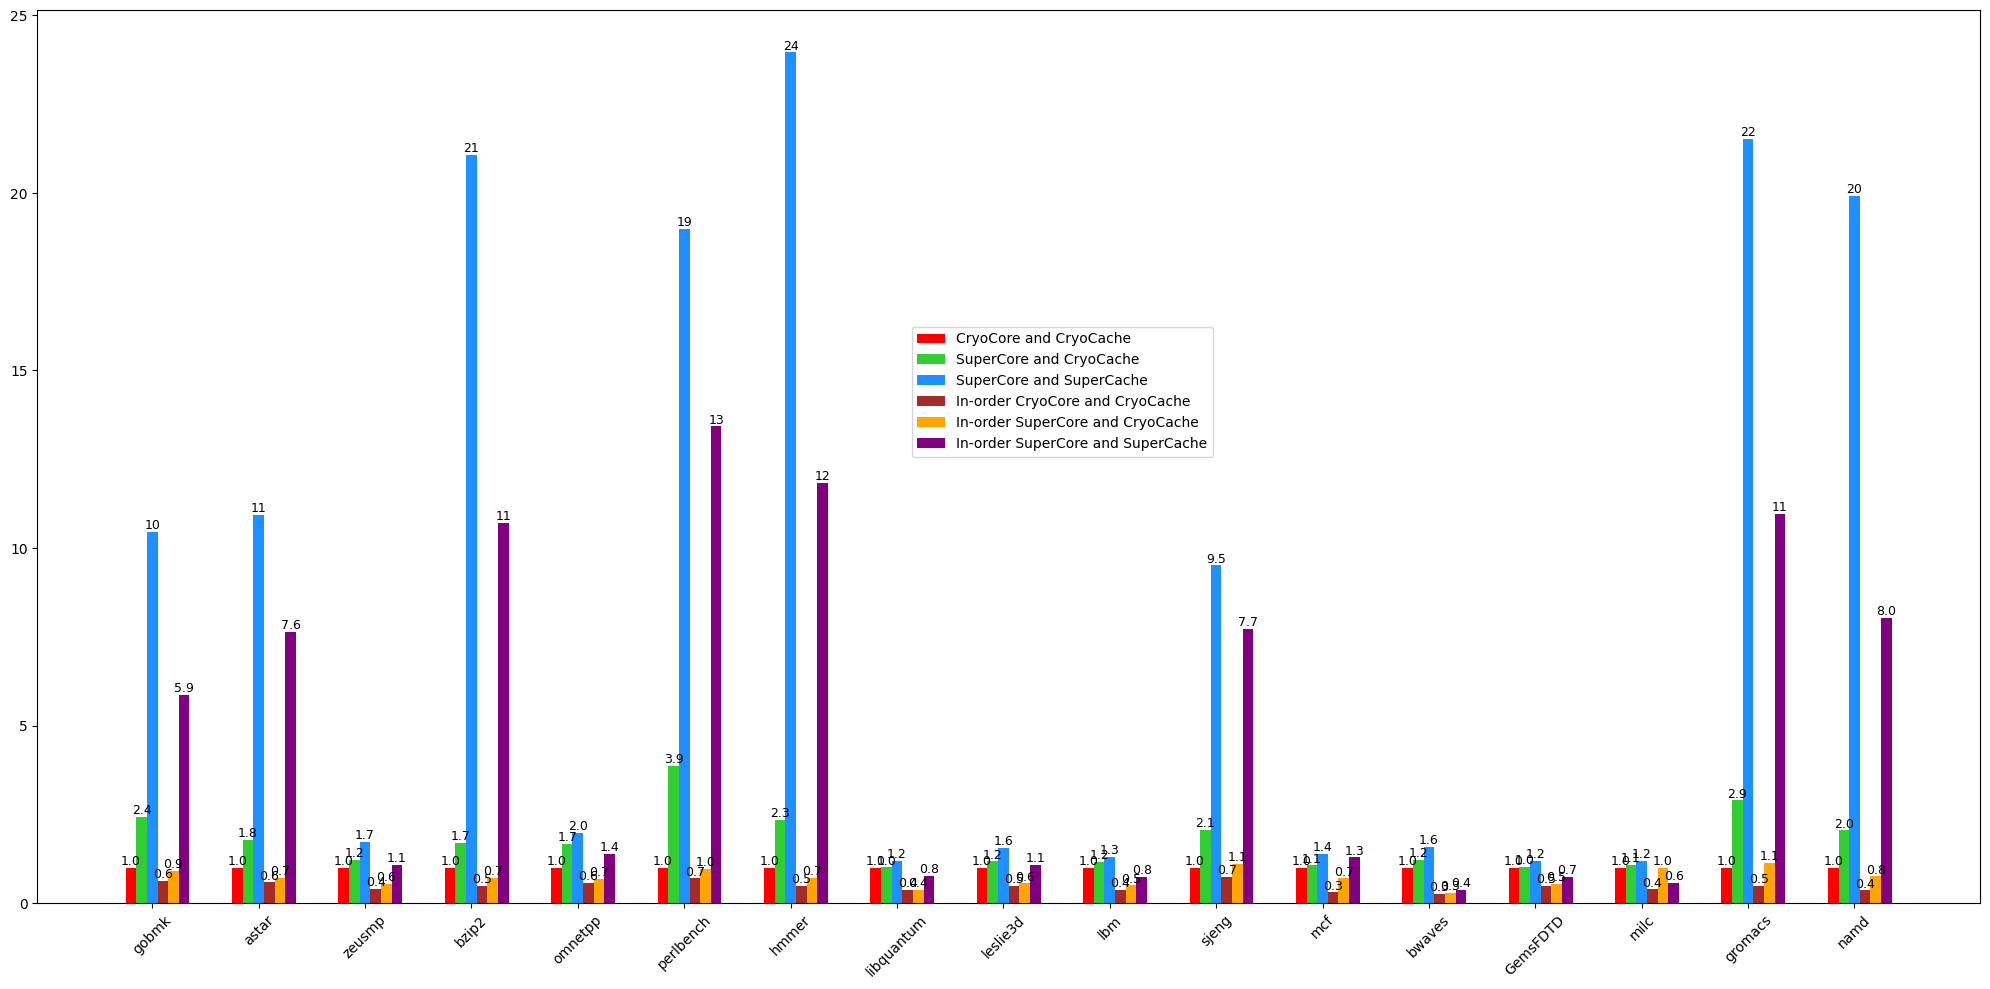

In [18]:
def speedup():
    # plot speedup

    plt.figure(figsize=(20, 10))

    # Define width of each bar
    bar_width = 0.2

    # Calculate offset for each set of bars
    offset = np.arange(len(df['Benchmark'])) * 2

    # speedup is old / new seconds
    df['speedup_cryocorecryocache'] = 1.0
    df['speedup_supercorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercorecryocache']
    df['speedup_supercoresupercache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercoresupercache']
    df['speedup_inordersupercoresupercache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_inordersupercoresupercache']
    df['speedup_inordersupercorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_inordersupercorecryocache']
    df['speedup_inordercryocorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_inordercryocorecryocache']

    # print speedup values for each benchmark
    print(df[['Benchmark', 'speedup_supercorecryocache', 'speedup_supercoresupercache', 'speedup_inordersupercoresupercache', 'speedup_inordersupercorecryocache', 'speedup_inordercryocorecryocache']])

    # Plot each set of bars with appropriate offset
    bar1 = plt.bar(offset - 2 * bar_width, df['speedup_cryocorecryocache'], width=bar_width, label='CryoCore and CryoCache', color='r')
    bar2 = plt.bar(offset - bar_width, df['speedup_supercorecryocache'], width=bar_width, label='SuperCore and CryoCache', color='limegreen')
    bar3 = plt.bar(offset, df['speedup_supercoresupercache'], width=bar_width, label='SuperCore and SuperCache', color='dodgerblue')
    bar4 = plt.bar(offset + bar_width, df['speedup_inordercryocorecryocache'], width=bar_width, label='In-order CryoCore and CryoCache', color='brown')
    bar5 = plt.bar(offset + 2 * bar_width, df['speedup_inordersupercorecryocache'], width=bar_width, label='In-order SuperCore and CryoCache', color='orange')
    bar6 = plt.bar(offset + 3 * bar_width, df['speedup_inordersupercoresupercache'], width=bar_width, label='In-order SuperCore and SuperCache', color='purple')

            # Function to annotate bars with their values
    def annotate_bars(bars):
        for bar in bars:
            height = bar.get_height()
            # Use format string to ensure one decimal place without scientific notation
            if height >= 10:
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=9)
            else:
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=9)
    
    # Annotate bars with their values
    annotate_bars(bar1)
    annotate_bars(bar2)
    annotate_bars(bar3)
    annotate_bars(bar4)
    annotate_bars(bar5)
    annotate_bars(bar6)

    plt.xticks(ticks=offset, labels=df['Benchmark'], rotation=45, fontsize=10)  # Set x-axis ticks and labels
    plt.legend(loc=(0.45, 0.5))  # Show legend
    plt.savefig("Speedup.png")  # Save the plot as a PNG file
    # plt.title('Speedup')  # Set plot title
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

speedup()

     Benchmark  speedup_supercorecryocache  speedup_supercoresupercache  \
0        gobmk                    2.432243                    10.461336   
1        astar                    1.787604                    10.931611   
2       zeusmp                    1.223131                     1.729291   
3        bzip2                    1.692233                    21.062424   
4      omnetpp                    1.666671                     1.986075   
5    perlbench                    3.877134                    18.985640   
6        hmmer                    2.349557                    23.956463   
7   libquantum                    1.013247                     1.200666   
8     leslie3d                    1.175759                     1.558335   
9          lbm                    1.155128                     1.295012   
10       sjeng                    2.068265                     9.512468   
11         mcf                    1.068585                     1.399420   
12      bwaves           

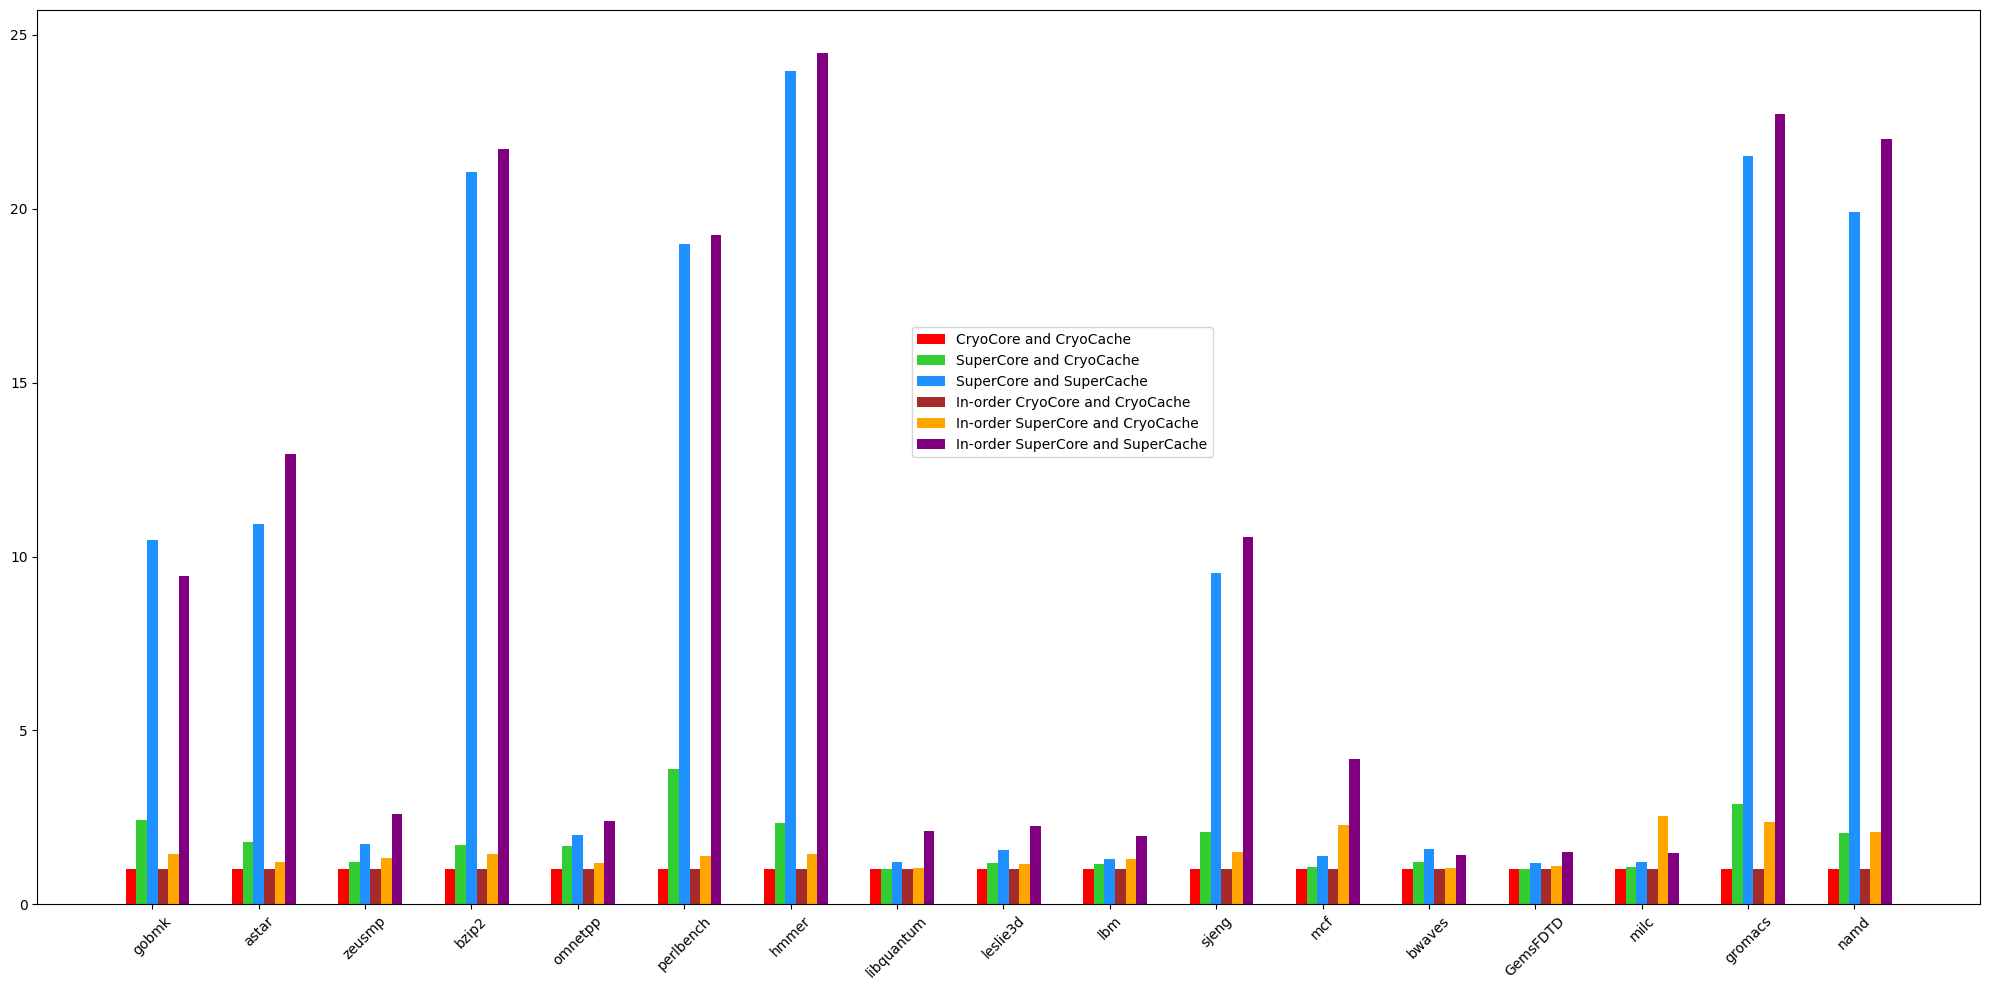

In [19]:
def speedup():
    # plot speedup

    plt.figure(figsize=(20, 10))

    # Define width of each bar
    bar_width = 0.2

    # Calculate offset for each set of bars
    offset = np.arange(len(df['Benchmark'])) * 2

    # speedup is old / new seconds
    df['speedup_cryocorecryocache'] = 1.0
    df['speedup_supercorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercorecryocache']
    df['speedup_supercoresupercache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercoresupercache']
    df['speedup_inordersupercoresupercache'] = df['weightedSeconds_inordercryocorecryocache'] / df['weightedSeconds_inordersupercoresupercache']
    df['speedup_inordersupercorecryocache'] = df['weightedSeconds_inordercryocorecryocache'] / df['weightedSeconds_inordersupercorecryocache']
    df['speedup_inordercryocorecryocache'] = df['weightedSeconds_inordercryocorecryocache'] / df['weightedSeconds_inordercryocorecryocache']

    # print speedup values for each benchmark
    print(df[['Benchmark', 'speedup_supercorecryocache', 'speedup_supercoresupercache', 'speedup_inordersupercoresupercache', 'speedup_inordersupercorecryocache', 'speedup_inordercryocorecryocache']])

    # Plot each set of bars with appropriate offset
    plt.bar(offset - 2 * bar_width, df['speedup_cryocorecryocache'], width=bar_width, label='CryoCore and CryoCache', color='r')
    plt.bar(offset - bar_width, df['speedup_supercorecryocache'], width=bar_width, label='SuperCore and CryoCache', color='limegreen')
    plt.bar(offset, df['speedup_supercoresupercache'], width=bar_width, label='SuperCore and SuperCache', color='dodgerblue')
    plt.bar(offset + bar_width, df['speedup_inordercryocorecryocache'], width=bar_width, label='In-order CryoCore and CryoCache', color='brown')
    plt.bar(offset + 2 * bar_width, df['speedup_inordersupercorecryocache'], width=bar_width, label='In-order SuperCore and CryoCache', color='orange')
    plt.bar(offset + 3 * bar_width, df['speedup_inordersupercoresupercache'], width=bar_width, label='In-order SuperCore and SuperCache', color='purple')

    plt.xticks(ticks=offset, labels=df['Benchmark'], rotation=45, fontsize=10)  # Set x-axis ticks and labels
    plt.legend(loc=(0.45, 0.5))  # Show legend
    plt.savefig("Speedup.png")  # Save the plot as a PNG file
    # plt.title('Speedup')  # Set plot title
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

speedup()

     Benchmark  speedup_supercorecryocache  speedup_supercoresupercache  \
0        gobmk                         1.0                     4.301106   
1        astar                         1.0                     6.115231   
2       zeusmp                         1.0                     1.413823   
3        bzip2                         1.0                    12.446526   
4      omnetpp                         1.0                     1.191641   
5    perlbench                         1.0                     4.896823   
6        hmmer                         1.0                    10.196160   
7   libquantum                         1.0                     1.184969   
8     leslie3d                         1.0                     1.325386   
9          lbm                         1.0                     1.121098   
10       sjeng                         1.0                     4.599251   
11         mcf                         1.0                     1.309602   
12      bwaves           

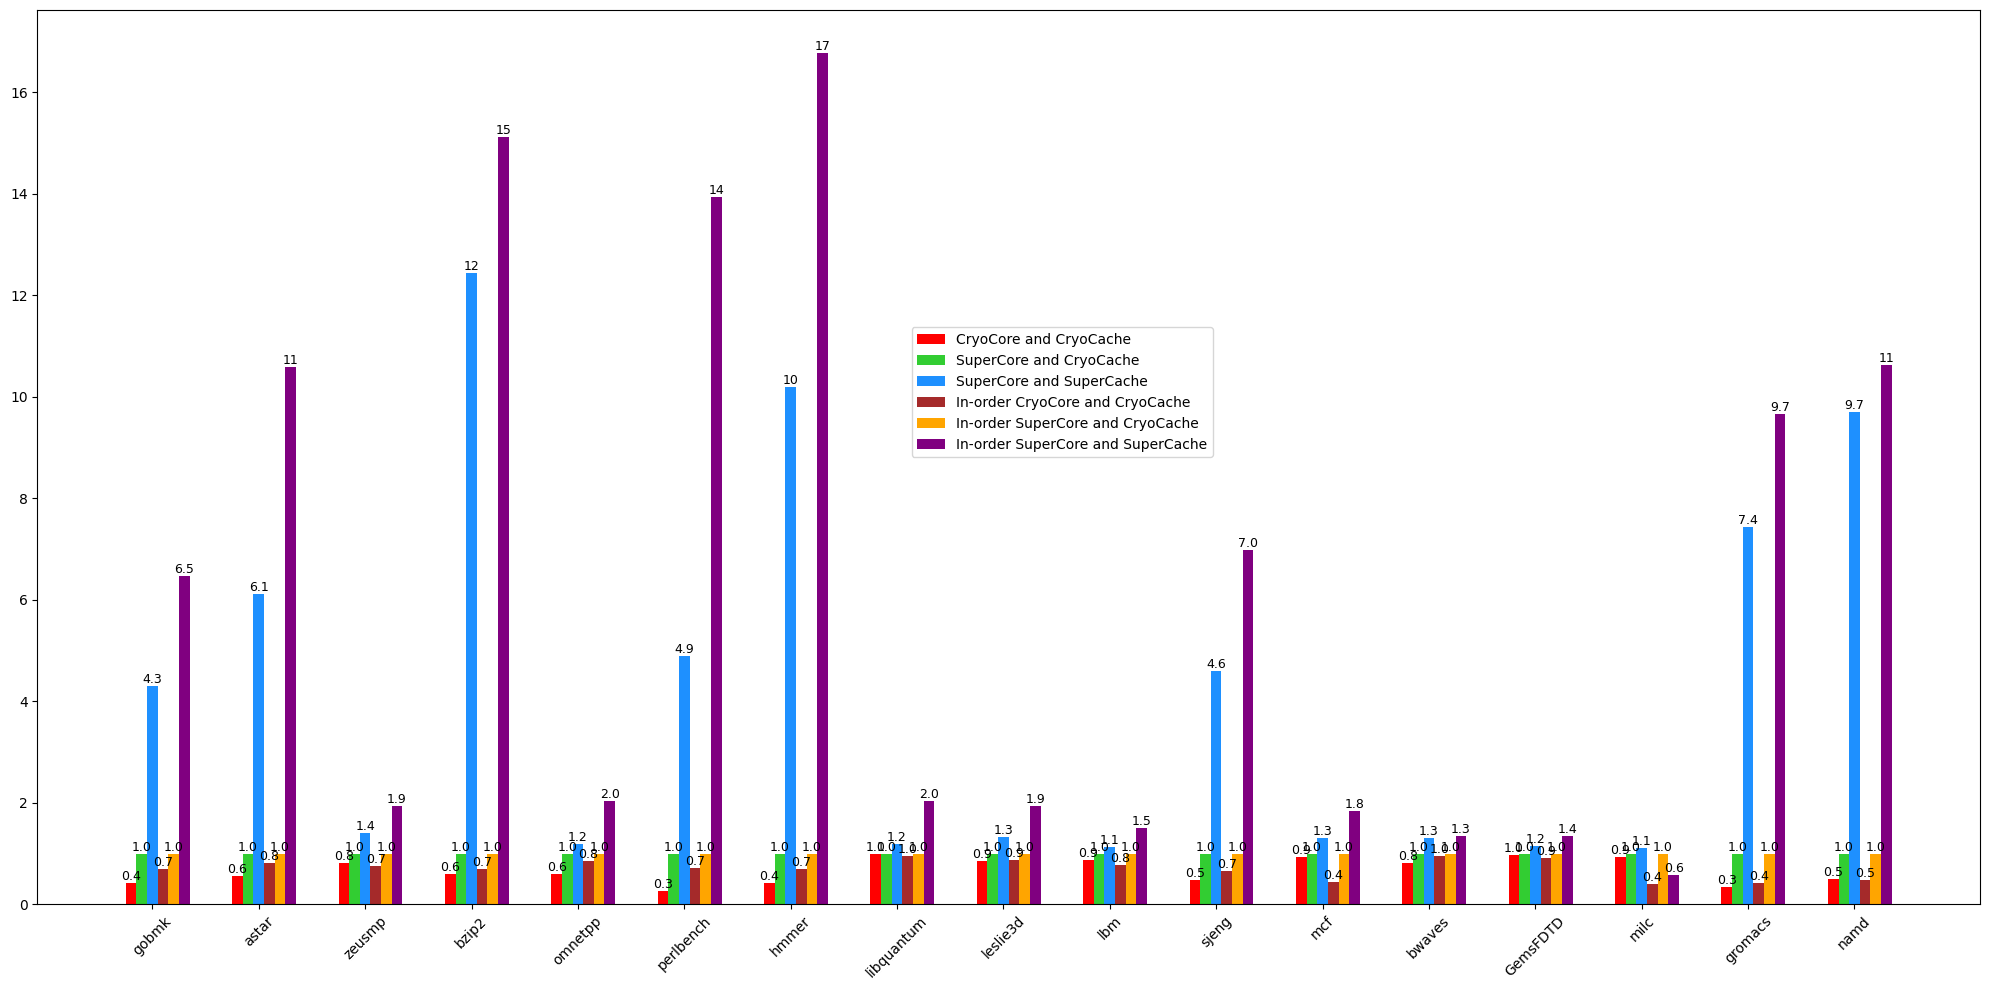

In [20]:
def speedup():
    # plot speedup

    plt.figure(figsize=(20, 10))

    # Define width of each bar
    bar_width = 0.2

    # Calculate offset for each set of bars
    offset = np.arange(len(df['Benchmark'])) * 2

    # speedup is old / new seconds with respect to SuperCore and CryoCache
    df['speedup_cryocorecryocache'] = df['weightedSeconds_supercorecryocache'] / df['weightedSeconds_cryocorecryocache']
    df['speedup_supercorecryocache'] = 1.0
    df['speedup_supercoresupercache'] = df['weightedSeconds_supercorecryocache'] / df['weightedSeconds_supercoresupercache']
    df['speedup_inordersupercoresupercache'] = df['weightedSeconds_inordersupercorecryocache'] / df['weightedSeconds_inordersupercoresupercache']
    df['speedup_inordersupercorecryocache'] = df['weightedSeconds_inordersupercorecryocache'] / df['weightedSeconds_inordersupercorecryocache']
    df['speedup_inordercryocorecryocache'] = df['weightedSeconds_inordersupercorecryocache'] / df['weightedSeconds_inordercryocorecryocache']

    # print speedup values for each benchmark
    print(df[['Benchmark', 'speedup_supercorecryocache', 'speedup_supercoresupercache', 'speedup_inordersupercoresupercache', 'speedup_inordersupercorecryocache', 'speedup_inordercryocorecryocache']])

    # Plot each set of bars with appropriate offset
    bar1 = plt.bar(offset - 2 * bar_width, df['speedup_cryocorecryocache'], width=bar_width, label='CryoCore and CryoCache', color='r')
    bar2 = plt.bar(offset - bar_width, df['speedup_supercorecryocache'], width=bar_width, label='SuperCore and CryoCache', color='limegreen')
    bar3 = plt.bar(offset, df['speedup_supercoresupercache'], width=bar_width, label='SuperCore and SuperCache', color='dodgerblue')
    bar4 = plt.bar(offset + bar_width, df['speedup_inordercryocorecryocache'], width=bar_width, label='In-order CryoCore and CryoCache', color='brown')
    bar5 = plt.bar(offset + 2 * bar_width, df['speedup_inordersupercorecryocache'], width=bar_width, label='In-order SuperCore and CryoCache', color='orange')
    bar6 = plt.bar(offset + 3 * bar_width, df['speedup_inordersupercoresupercache'], width=bar_width, label='In-order SuperCore and SuperCache', color='purple')

        # Function to annotate bars with their values
    def annotate_bars(bars):
        for bar in bars:
            height = bar.get_height()
            # Use format string to ensure one decimal place without scientific notation
            if height >= 10:
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=9)
            else:
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

    # Annotate bars with their values
    annotate_bars(bar1)
    annotate_bars(bar2)
    annotate_bars(bar3)
    annotate_bars(bar4)
    annotate_bars(bar5)
    annotate_bars(bar6)



    plt.xticks(ticks=offset, labels=df['Benchmark'], rotation=45, fontsize=10)  # Set x-axis ticks and labels
    plt.legend(loc=(0.45, 0.5))  # Show legend
    plt.savefig("Speedup.png")  # Save the plot as a PNG file
    # plt.title('Speedup')  # Set plot title
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

speedup()

     Benchmark  speedup_supercorecryocache  speedup_supercoresupercache  \
0        gobmk                    2.432243                    10.461336   
1        astar                    1.787604                    10.931611   
2       zeusmp                    1.223131                     1.729291   
3        bzip2                    1.692233                    21.062424   
4      omnetpp                    1.666671                     1.986075   
5    perlbench                    3.877134                    18.985640   
6        hmmer                    2.349557                    23.956463   
7   libquantum                    1.013247                     1.200666   
8     leslie3d                    1.175759                     1.558335   
9          lbm                    1.155128                     1.295012   
10       sjeng                    2.068265                     9.512468   
11         mcf                    1.068585                     1.399420   
12      bwaves           

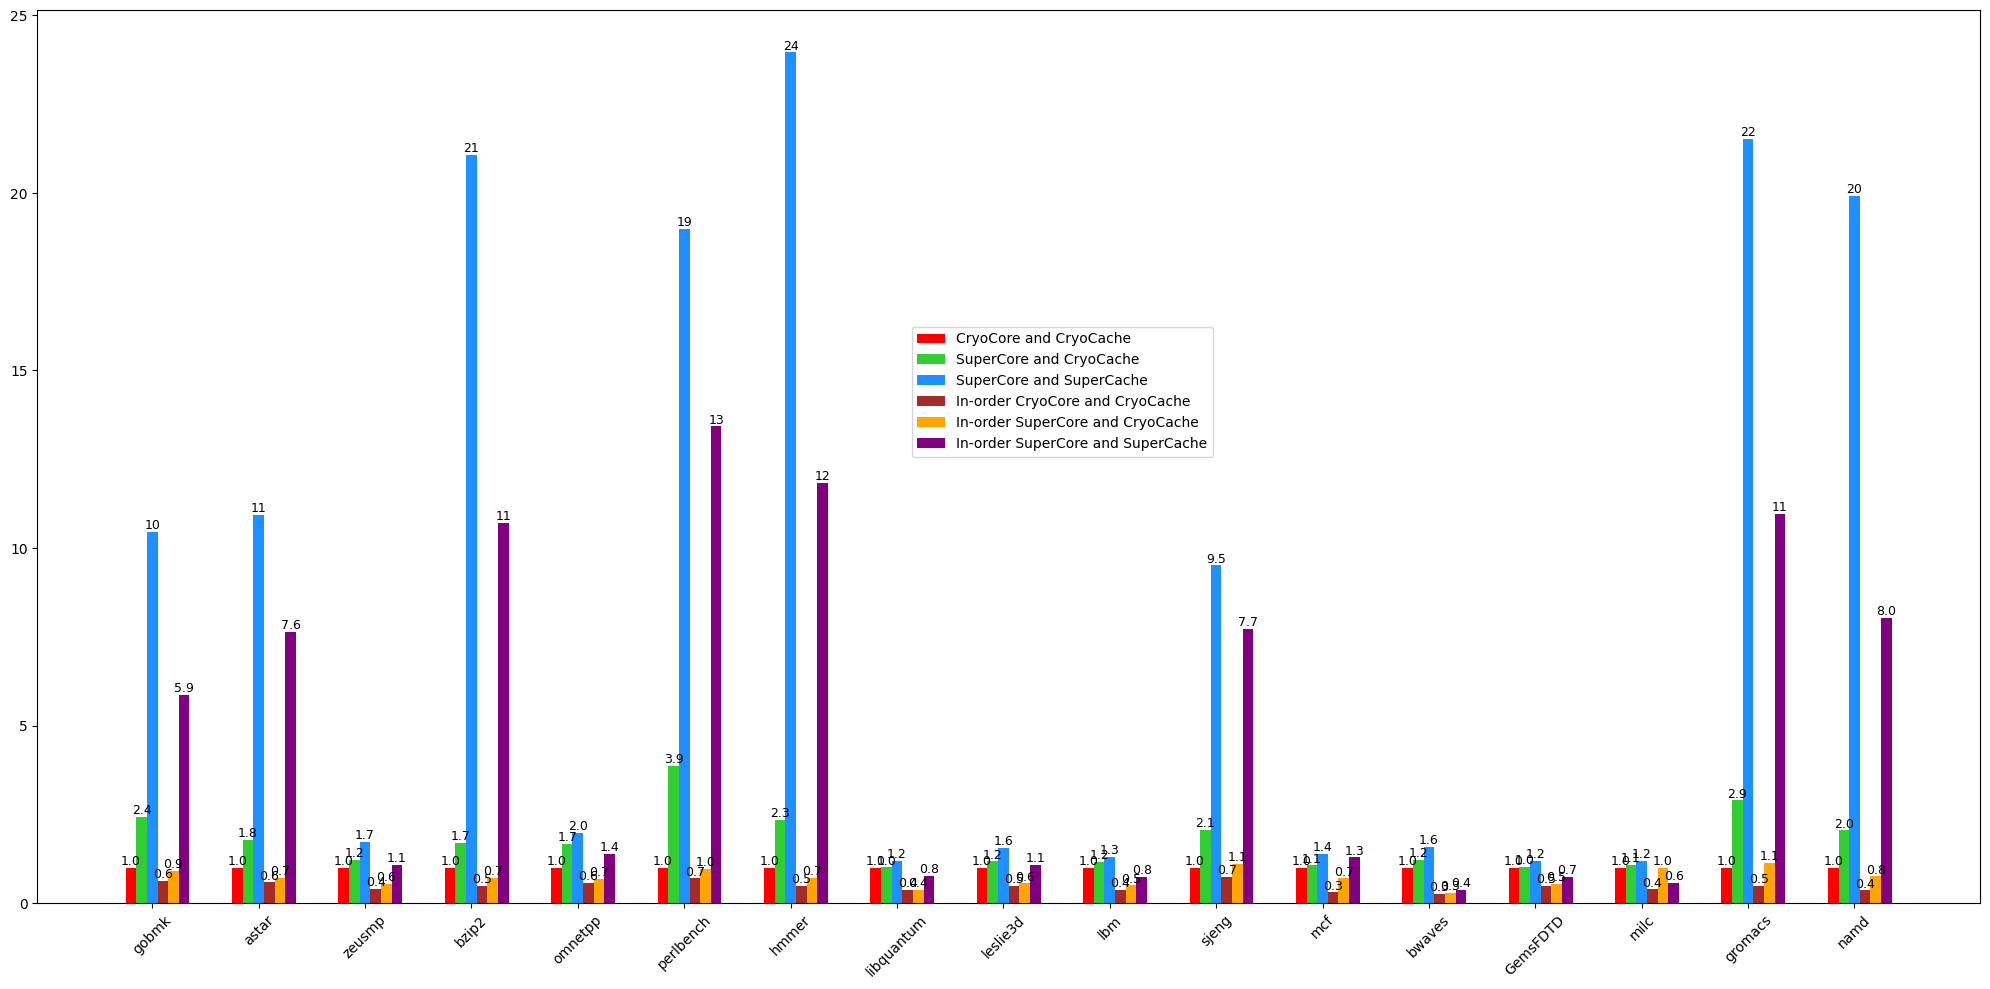

In [21]:
def speedup():
    # plot speedup

    plt.figure(figsize=(20, 10))

    # Define width of each bar
    bar_width = 0.2

    # Calculate offset for each set of bars
    offset = np.arange(len(df['Benchmark'])) * 2

    # speedup is old / new seconds with respect to SuperCore and CryoCache
    df['speedup_cryocorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_cryocorecryocache']
    df['speedup_supercorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercorecryocache']
    df['speedup_supercoresupercache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercoresupercache']
    df['speedup_inordersupercoresupercache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_inordersupercoresupercache']
    df['speedup_inordersupercorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_inordersupercorecryocache']
    df['speedup_inordercryocorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_inordercryocorecryocache']

    # print speedup values for each benchmark
    print(df[['Benchmark', 'speedup_supercorecryocache', 'speedup_supercoresupercache', 'speedup_inordersupercoresupercache', 'speedup_inordersupercorecryocache', 'speedup_inordercryocorecryocache']])

    # Plot each set of bars with appropriate offset
    bar1 = plt.bar(offset - 2 * bar_width, df['speedup_cryocorecryocache'], width=bar_width, label='CryoCore and CryoCache', color='r')
    bar2 = plt.bar(offset - bar_width, df['speedup_supercorecryocache'], width=bar_width, label='SuperCore and CryoCache', color='limegreen')
    bar3 = plt.bar(offset, df['speedup_supercoresupercache'], width=bar_width, label='SuperCore and SuperCache', color='dodgerblue')
    bar4 = plt.bar(offset + bar_width, df['speedup_inordercryocorecryocache'], width=bar_width, label='In-order CryoCore and CryoCache', color='brown')
    bar5 = plt.bar(offset + 2 * bar_width, df['speedup_inordersupercorecryocache'], width=bar_width, label='In-order SuperCore and CryoCache', color='orange')
    bar6 = plt.bar(offset + 3 * bar_width, df['speedup_inordersupercoresupercache'], width=bar_width, label='In-order SuperCore and SuperCache', color='purple')

        # Function to annotate bars with their values
    def annotate_bars(bars):
        for bar in bars:
            height = bar.get_height()
            # Use format string to ensure one decimal place without scientific notation
            if height >= 10:
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=9)
            else:
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

    # Annotate bars with their values
    annotate_bars(bar1)
    annotate_bars(bar2)
    annotate_bars(bar3)
    annotate_bars(bar4)
    annotate_bars(bar5)
    annotate_bars(bar6)



    plt.xticks(ticks=offset, labels=df['Benchmark'], rotation=45, fontsize=10)  # Set x-axis ticks and labels
    plt.legend(loc=(0.45, 0.5))  # Show legend
    plt.savefig("Speedup.png")  # Save the plot as a PNG file
    # plt.title('Speedup')  # Set plot title
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

speedup()

     Benchmark  speedup_supercorecryocache  speedup_supercoresupercache  \
0        gobmk                    2.432243                    10.461336   
1        astar                    1.787604                    10.931611   
2       zeusmp                    1.223131                     1.729291   
3        bzip2                    1.692233                    21.062424   
4      omnetpp                    1.666671                     1.986075   
5    perlbench                    3.877134                    18.985640   
6        hmmer                    2.349557                    23.956463   
7   libquantum                    1.013247                     1.200666   
8     leslie3d                    1.175759                     1.558335   
9          lbm                    1.155128                     1.295012   
10       sjeng                    2.068265                     9.512468   
11         mcf                    1.068585                     1.399420   
12      bwaves           

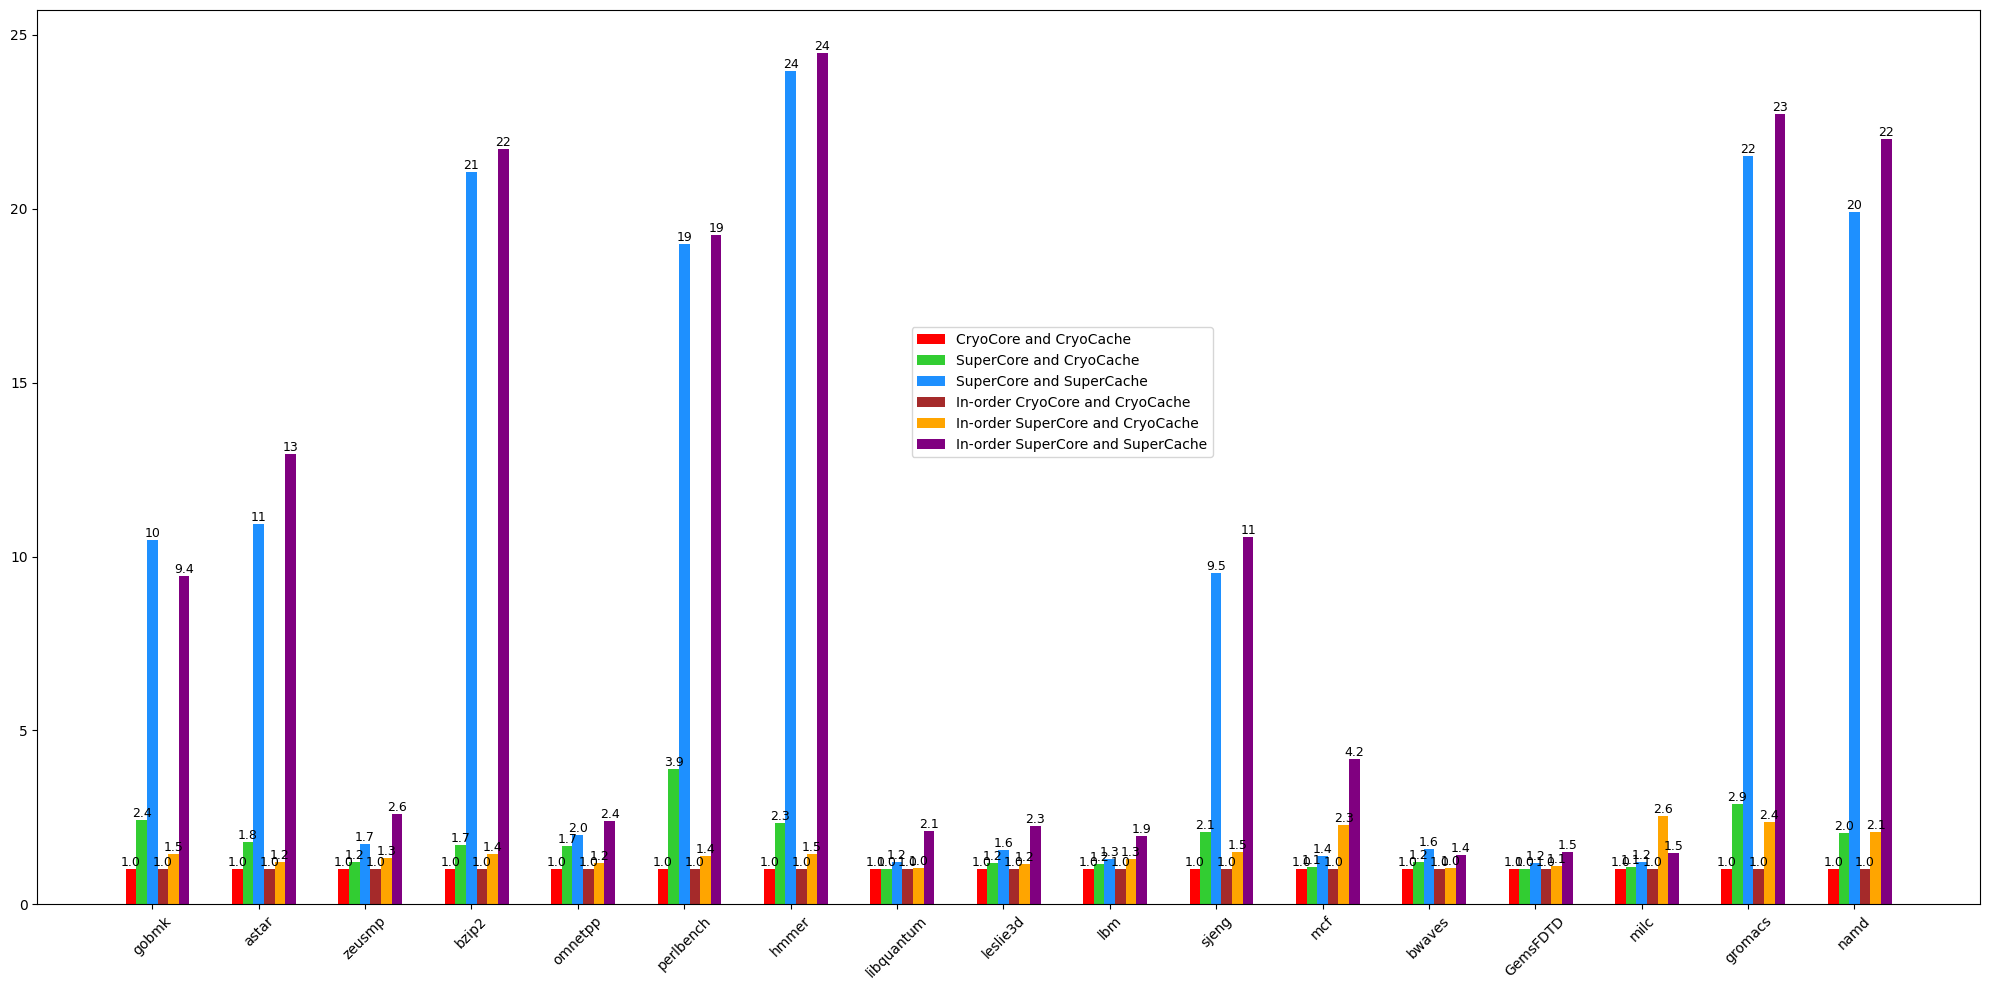

In [22]:
def speedup():
    # plot speedup

    plt.figure(figsize=(20, 10))

    # Define width of each bar
    bar_width = 0.2

    # Calculate offset for each set of bars
    offset = np.arange(len(df['Benchmark'])) * 2

    # speedup is old / new seconds with respect to SuperCore and CryoCache
    df['speedup_cryocorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_cryocorecryocache']
    df['speedup_supercorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercorecryocache']
    df['speedup_supercoresupercache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercoresupercache']
    df['speedup_inordersupercoresupercache'] = df['weightedSeconds_inordercryocorecryocache'] / df['weightedSeconds_inordersupercoresupercache']
    df['speedup_inordersupercorecryocache'] = df['weightedSeconds_inordercryocorecryocache'] / df['weightedSeconds_inordersupercorecryocache']
    df['speedup_inordercryocorecryocache'] = df['weightedSeconds_inordercryocorecryocache'] / df['weightedSeconds_inordercryocorecryocache']

    # print speedup values for each benchmark
    print(df[['Benchmark', 'speedup_supercorecryocache', 'speedup_supercoresupercache', 'speedup_inordersupercoresupercache', 'speedup_inordersupercorecryocache', 'speedup_inordercryocorecryocache']])

    # Plot each set of bars with appropriate offset
    bar1 = plt.bar(offset - 2 * bar_width, df['speedup_cryocorecryocache'], width=bar_width, label='CryoCore and CryoCache', color='r')
    bar2 = plt.bar(offset - bar_width, df['speedup_supercorecryocache'], width=bar_width, label='SuperCore and CryoCache', color='limegreen')
    bar3 = plt.bar(offset, df['speedup_supercoresupercache'], width=bar_width, label='SuperCore and SuperCache', color='dodgerblue')
    bar4 = plt.bar(offset + bar_width, df['speedup_inordercryocorecryocache'], width=bar_width, label='In-order CryoCore and CryoCache', color='brown')
    bar5 = plt.bar(offset + 2 * bar_width, df['speedup_inordersupercorecryocache'], width=bar_width, label='In-order SuperCore and CryoCache', color='orange')
    bar6 = plt.bar(offset + 3 * bar_width, df['speedup_inordersupercoresupercache'], width=bar_width, label='In-order SuperCore and SuperCache', color='purple')

        # Function to annotate bars with their values
    def annotate_bars(bars):
        for bar in bars:
            height = bar.get_height()
            # Use format string to ensure one decimal place without scientific notation
            if height >= 10:
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=9)
            else:
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

    # Annotate bars with their values
    annotate_bars(bar1)
    annotate_bars(bar2)
    annotate_bars(bar3)
    annotate_bars(bar4)
    annotate_bars(bar5)
    annotate_bars(bar6)



    plt.xticks(ticks=offset, labels=df['Benchmark'], rotation=45, fontsize=10)  # Set x-axis ticks and labels
    plt.legend(loc=(0.45, 0.5))  # Show legend
    plt.savefig("Speedup.png")  # Save the plot as a PNG file
    # plt.title('Speedup')  # Set plot title
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

speedup()

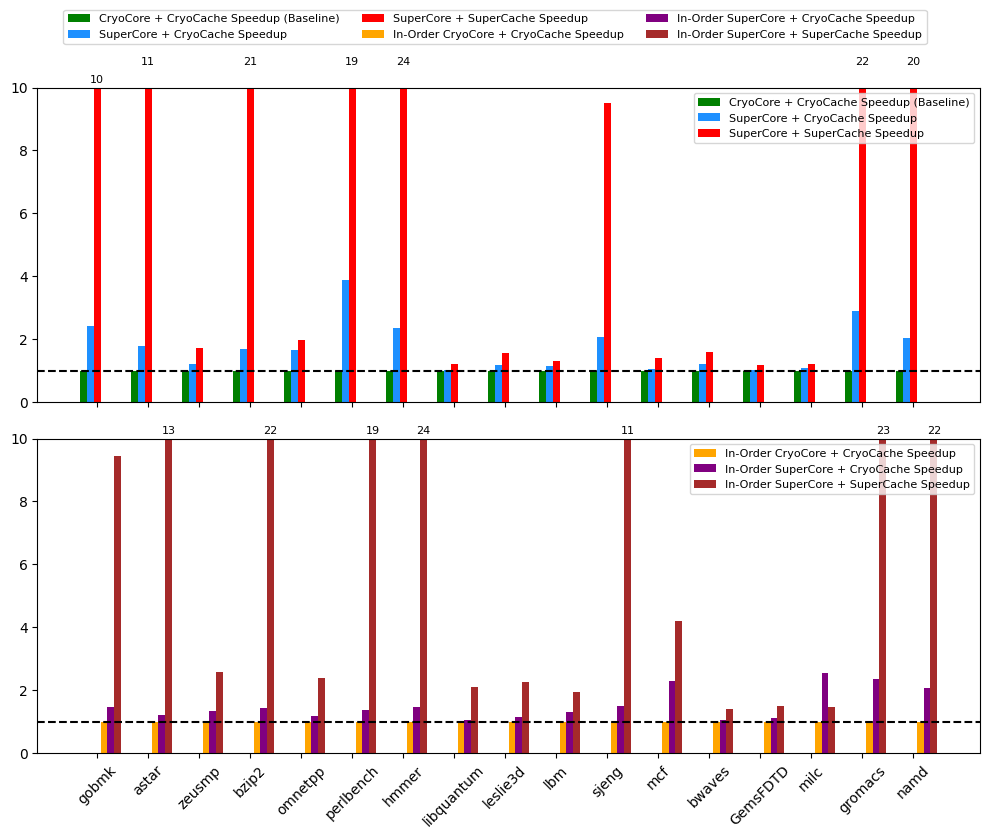

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def annotate_bars(ax, bars):
    for bar in bars:
        height = bar.get_height()
        truncated_height = min(height, 10)  # Truncate height to 10 if greater than 10
        y_position = truncated_height + 0.1  # Default position above the bar

        # Check for nearby bars to avoid overlap
        for other_bar in bars:
            if other_bar == bar:
                continue
            other_height = other_bar.get_height()
            if abs(other_height - truncated_height) < 0.5:
                y_position = max(y_position, other_height + 0.2)  # Adjust y_position to avoid overlap

        if height >= 10:
            ax.text(bar.get_x() + bar.get_width() / 2, y_position, f'{height:.0f}', ha='center', va='bottom', fontsize=8)
            # Draw a line from the top of the bar to the text
            line_length = max(0.1, height * 0.02)  # Adjust multiplier (0.02) as needed for line length relative to bar height
            ax.plot([bar.get_x() + bar.get_width() / 2, bar.get_x() + bar.get_width() / 2], [height, height + line_length], color='black', linestyle='-', linewidth=0.5)
        else:
            pass

def plot_speedup(df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    bar_width = 0.2
    offset = np.arange(len(df['Benchmark'])) * 1.5

    # Plotting for the first subplot
    bars1 = ax1.bar(offset - 2 * bar_width, df['speedup_cryocorecryocache'], width=bar_width, label='CryoCore + CryoCache Speedup (Baseline)', color='green')
    bars2 = ax1.bar(offset - bar_width, df['speedup_supercorecryocache'], width=bar_width, label='SuperCore + CryoCache Speedup', color='dodgerblue')
    bars3 = ax1.bar(offset, df['speedup_supercoresupercache'], width=bar_width, label='SuperCore + SuperCache Speedup', color='red')

    ax1.axhline(y=1, color='black', linestyle='--')
    annotate_bars(ax1, bars1)
    annotate_bars(ax1, bars2)
    annotate_bars(ax1, bars3)
    ax1.set_ylim(0, 10)  # Set y-limit for the first subplot
    ax1.legend(fontsize=8, loc='upper right')

    # Plotting for the second subplot
    bars4 = ax2.bar(offset + 1*bar_width, df['speedup_inordercryocorecryocache'], width=bar_width, label='In-Order CryoCore + CryoCache Speedup', color='orange')
    bars5 = ax2.bar(offset + 2*bar_width, df['speedup_inordersupercorecryocache'], width=bar_width, label='In-Order SuperCore + CryoCache Speedup', color='purple')
    bars6 = ax2.bar(offset + 3*bar_width, df['speedup_inordersupercoresupercache'], width=bar_width, label='In-Order SuperCore + SuperCache Speedup', color='brown')

    ax2.axhline(y=1, color='black', linestyle='--')
    annotate_bars(ax2, bars4)
    annotate_bars(ax2, bars5)
    annotate_bars(ax2, bars6)
    ax2.set_ylim(0, 10)  # Set y-limit for the second subplot
    ax2.legend(fontsize=8, loc='upper right')

    plt.xticks(ticks=offset, labels=df['Benchmark'], rotation=45)
    plt.tight_layout()

    # Add a legend between subplots with 3 columns
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=8)

    plt.savefig('speedup_workloads.pdf', bbox_inches='tight')
    plt.show()

plot_speedup(df)


/tmp/ipykernel_1078320/3766165738.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['speedup_cryocorecryocache'] = df_subset['weightedSeconds_cryocorecryocache'] / df_subset['weightedSeconds_cryocorecryocache']
/tmp/ipykernel_1078320/3766165738.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['speedup_supercorecryocache'] = df_subset['weightedSeconds_cryocorecryocache'] / df_subset['weightedSeconds_supercorecryocache']
/tmp/ipykernel_1078320/3766165738.py:29: SettingWithCopyWarnin

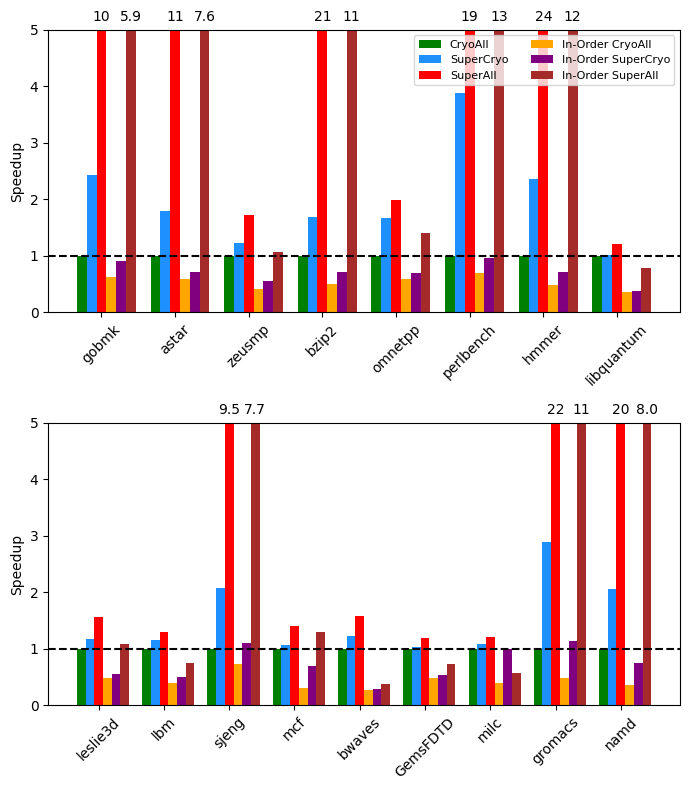

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

# Assuming df is your DataFrame containing benchmark data

def plot_speedup():
    plt.figure(figsize=(7, 8))  # Larger figure size to accommodate two plots vertically
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])  # 2 rows, 1 column

    # First plot (top)
    ax1 = plt.subplot(gs[0])
    plot_subset(ax1, df.iloc[:len(df)//2], legend=True)

    # Second plot (bottom)
    ax2 = plt.subplot(gs[1])
    plot_subset(ax2, df.iloc[len(df)//2:])

    plt.tight_layout()
    plt.savefig('speedup_workloads.pdf', bbox_inches='tight')
    plt.show()

def plot_subset(ax, df_subset, legend=False):
    bar_width = 0.2
    offset = np.arange(len(df_subset['Benchmark'])) * 1.5
    df_subset['speedup_cryocorecryocache'] = df_subset['weightedSeconds_cryocorecryocache'] / df_subset['weightedSeconds_cryocorecryocache']
    df_subset['speedup_supercorecryocache'] = df_subset['weightedSeconds_cryocorecryocache'] / df_subset['weightedSeconds_supercorecryocache']
    df_subset['speedup_supercoresupercache'] = df_subset['weightedSeconds_cryocorecryocache'] / df_subset['weightedSeconds_supercoresupercache']
    df_subset['speedup_inordercryocorecryocache'] = df_subset['weightedSeconds_cryocorecryocache'] / df_subset['weightedSeconds_inordercryocorecryocache']
    df_subset['speedup_inordersupercorecryocache'] = df_subset['weightedSeconds_cryocorecryocache'] / df_subset['weightedSeconds_inordersupercorecryocache']
    df_subset['speedup_inordersupercoresupercache'] = df_subset['weightedSeconds_cryocorecryocache'] / df_subset['weightedSeconds_inordersupercoresupercache']

    bars1 = ax.bar(offset - 2 * bar_width, df_subset['speedup_cryocorecryocache'], width=bar_width, label='CryoAll', color='green')
    bars2 = ax.bar(offset - bar_width, df_subset['speedup_supercorecryocache'], width=bar_width, label='SuperCryo', color='dodgerblue')
    bars3 = ax.bar(offset, df_subset['speedup_supercoresupercache'], width=bar_width, label='SuperAll', color='red')
    bars4 = ax.bar(offset + 1*bar_width, df_subset['speedup_inordercryocorecryocache'], width=bar_width, label='In-Order CryoAll', color='orange')
    bars5 = ax.bar(offset + 2*bar_width, df_subset['speedup_inordersupercorecryocache'], width=bar_width, label='In-Order SuperCryo', color='purple')
    bars6 = ax.bar(offset + 3*bar_width, df_subset['speedup_inordersupercoresupercache'], width=bar_width, label='In-Order SuperAll', color='brown')

    ax.axhline(y=1, color='black', linestyle='--')

    def annotate_bars(bars):
        for bar in bars:
            height = bar.get_height()
            truncated_height = min(height, 5)  # Truncate height to 10 if greater than 10
            y_position = truncated_height + 0.1  # Default position above the bar

            # Check for nearby bars to avoid overlap
            for other_bar in bars:
                if other_bar == bar:
                    continue
                other_height = other_bar.get_height()
                if abs(other_height - truncated_height) < 0.5:
                    y_position = max(y_position, other_height + 0.2)  # Adjust y_position to avoid overlap

            if height >= 5:
                display_height = f'{height:.1f}'
                if len(display_height) >= 4:
                    display_height = f'{height:.0f}'
                ax.text(bar.get_x() + bar.get_width() / 2, y_position, f'{display_height}', ha='center', va='bottom', fontsize=10)
                # draw a line from the top of the bar to the text
                #line_length = max(0.1, height * 0.02)  # Adjust multiplier (0.02) as needed for line length relative to bar height
                #ax.plot([bar.get_x() + bar.get_width() / 2, bar.get_x() + bar.get_width() / 2], [height, height + line_length], color='black', linestyle='-', linewidth=0.5)
            else:
                pass

    annotate_bars(bars1)
    annotate_bars(bars2)
    annotate_bars(bars3)
    annotate_bars(bars4)
    annotate_bars(bars5)
    annotate_bars(bars6)

    # set y-limit for the subplot
    ax.set_ylim(0, 5)
    ax.set_ylabel('Speedup')
    ax.set_xticks(offset)
    ax.set_xticklabels(df_subset['Benchmark'], rotation=45)
    if legend:
        ax.legend(fontsize=8, ncol=2)

# Call the function to generate the plot
plot_speedup()


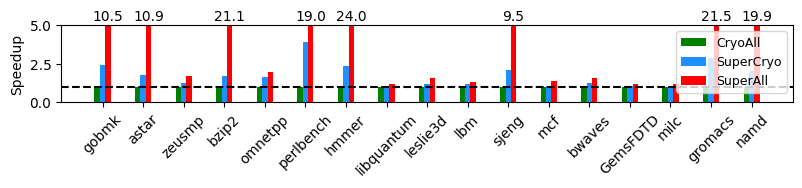

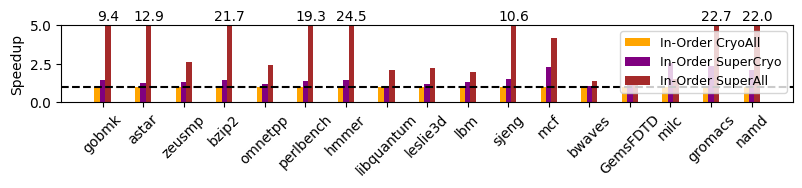

In [25]:
def separate_speedups():
    def annotate_bars(bars, heights):
        for bar, height in zip(bars, heights):
            truncated_height = min(height, 5)  # Truncate height to 5 if greater than 5
            y_position = truncated_height + 0.1  # Default position above the bar

            # Check for nearby bars to avoid overlap
            for other_bar in bars:
                if other_bar == bar:
                    continue
                other_height = other_bar.get_height()
                other_truncated_height = min(other_height, 5)
                if abs(other_truncated_height - truncated_height) < 0.5 and abs(other_bar.get_x() - bar.get_x()) < 0.5:
                    y_position = max(y_position, other_truncated_height + 0.2)  # Adjust y_position to avoid overlap

            if height >= 5:
                display_height = f'{height:.1f}'
                # if that display height is a whole number, don't show decimal places
                # if display_height.endswith('.0'):
                #     display_height = display_height[:-2]
                # if it is a whole number, don't show decimal places
                if height.is_integer():
                    plt.text(bar.get_x() + bar.get_width() / 2, y_position, f'{height:.0f}', ha='center', va='bottom', fontsize=10)
                else:
                    plt.text(bar.get_x() + bar.get_width() / 2, y_position, f'{display_height}', ha='center', va='bottom', fontsize=10)

    # Out-of-order speedups
    plt.figure(figsize=(8, 2))
    bar_width = 0.2
    offset = np.arange(len(df['Benchmark'])) * 1.5
    df['speedup_cryocorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_cryocorecryocache']
    df['speedup_supercorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercorecryocache']
    df['speedup_supercoresupercache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercoresupercache']

    plot1 = plt.bar(offset - bar_width, np.minimum(df['speedup_cryocorecryocache'], 5), width=bar_width, label='CryoAll', color='green')
    plot2 = plt.bar(offset, np.minimum(df['speedup_supercorecryocache'], 5), width=bar_width, label='SuperCryo', color='dodgerblue')
    plot3 = plt.bar(offset + bar_width, np.minimum(df['speedup_supercoresupercache'], 5), width=bar_width, label='SuperAll', color='red')

    annotate_bars(plot1, df['speedup_cryocorecryocache'])
    annotate_bars(plot2, df['speedup_supercorecryocache'])
    annotate_bars(plot3, df['speedup_supercoresupercache'])
    
    plt.axhline(y=1, color='black', linestyle='--')
    plt.xticks(ticks=offset, labels=df['Benchmark'], rotation=45)
    plt.legend(fontsize=9)
    plt.ylim(0, 5)
    plt.ylabel('Speedup')
    plt.tight_layout()
    plt.savefig('speedup_workloads_outoforder.pdf', bbox_inches='tight')
    plt.show()

    # In-order speedups
    plt.figure(figsize=(8, 2))
    bar_width = 0.2
    offset = np.arange(len(df['Benchmark'])) * 1.5
    df['speedup_inordercryocorecryocache'] = df['weightedSeconds_inordercryocorecryocache'] / df['weightedSeconds_inordercryocorecryocache']
    df['speedup_inordersupercorecryocache'] = df['weightedSeconds_inordercryocorecryocache'] / df['weightedSeconds_inordersupercorecryocache']
    df['speedup_inordersupercoresupercache'] = df['weightedSeconds_inordercryocorecryocache'] / df['weightedSeconds_inordersupercoresupercache']

    plot4 = plt.bar(offset - bar_width, np.minimum(df['speedup_inordercryocorecryocache'], 5), width=bar_width, label='In-Order CryoAll', color='orange')
    plot5 = plt.bar(offset, np.minimum(df['speedup_inordersupercorecryocache'], 5), width=bar_width, label='In-Order SuperCryo', color='purple')
    plot6 = plt.bar(offset + bar_width, np.minimum(df['speedup_inordersupercoresupercache'], 5), width=bar_width, label='In-Order SuperAll', color='brown')

    annotate_bars(plot4, df['speedup_inordercryocorecryocache'])
    annotate_bars(plot5, df['speedup_inordersupercorecryocache'])
    annotate_bars(plot6, df['speedup_inordersupercoresupercache'])
    
    plt.axhline(y=1, color='black', linestyle='--')
    plt.xticks(ticks=offset, labels=df['Benchmark'], rotation=45)
    plt.legend(fontsize=9)
    plt.ylim(0, 5)
    plt.ylabel('Speedup')
    plt.tight_layout()
    plt.savefig('speedup_workloads_inorder.pdf', bbox_inches='tight')
    plt.show()

separate_speedups()


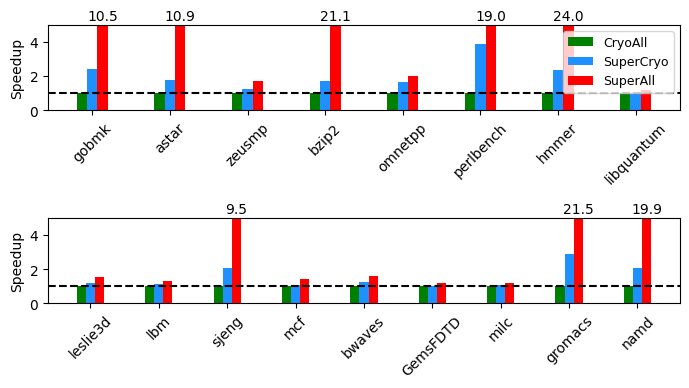

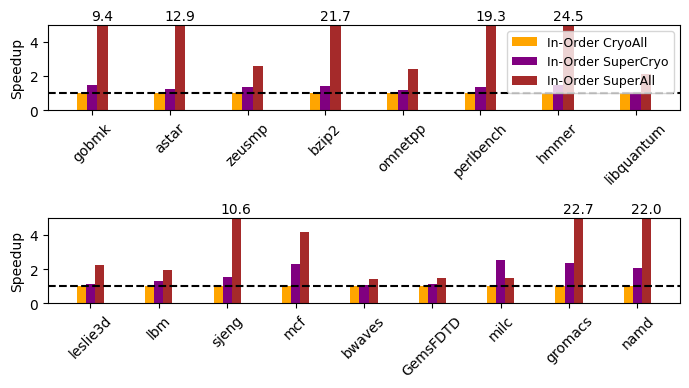

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import gridspec

def annotate_bars(ax, bars, heights):
    for bar, height in zip(bars, heights):
        truncated_height = min(height, 5)  # Truncate height to 5 if greater than 5
        y_position = truncated_height + 0.1  # Default position above the bar

        # Check for nearby bars to avoid overlap
        for other_bar in bars:
            if other_bar == bar:
                continue
            other_height = other_bar.get_height()
            other_truncated_height = min(other_height, 5)
            if abs(other_truncated_height - truncated_height) < 0.5 and abs(other_bar.get_x() - bar.get_x()) < 0.5:
                y_position = max(y_position, other_truncated_height + 0.2)  # Adjust y_position to avoid overlap

        display_height = f'{height:.1f}' if not height.is_integer() else f'{height:.0f}'
        if height >= 5:
            ax.text(bar.get_x() + bar.get_width() / 2, y_position, display_height, ha='center', va='bottom', fontsize=10)

def plot_speedups(df_subset, ax, title, show_legend):
    bar_width = 0.2
    offset = np.arange(len(df_subset['Benchmark'])) * 1.5
    if 'Out-of-Order' in title:
        plot1 = ax.bar(offset - bar_width, np.minimum(df_subset['speedup_cryocorecryocache'], 5), width=bar_width, label='CryoAll', color='green')
        plot2 = ax.bar(offset, np.minimum(df_subset['speedup_supercorecryocache'], 5), width=bar_width, label='SuperCryo', color='dodgerblue')
        plot3 = ax.bar(offset + bar_width, np.minimum(df_subset['speedup_supercoresupercache'], 5), width=bar_width, label='SuperAll', color='red')
        annotate_bars(ax, plot1, df_subset['speedup_cryocorecryocache'])
        annotate_bars(ax, plot2, df_subset['speedup_supercorecryocache'])
        annotate_bars(ax, plot3, df_subset['speedup_supercoresupercache'])
    else:
        plot1 = ax.bar(offset - bar_width, np.minimum(df_subset['speedup_inordercryocorecryocache'], 5), width=bar_width, label='In-Order CryoAll', color='orange')
        plot2 = ax.bar(offset, np.minimum(df_subset['speedup_inordersupercorecryocache'], 5), width=bar_width, label='In-Order SuperCryo', color='purple')
        plot3 = ax.bar(offset + bar_width, np.minimum(df_subset['speedup_inordersupercoresupercache'], 5), width=bar_width, label='In-Order SuperAll', color='brown')
        annotate_bars(ax, plot1, df_subset['speedup_inordercryocorecryocache'])
        annotate_bars(ax, plot2, df_subset['speedup_inordersupercorecryocache'])
        annotate_bars(ax, plot3, df_subset['speedup_inordersupercoresupercache'])

    ax.axhline(y=1, color='black', linestyle='--')
    ax.set_xticks(offset)
    ax.set_xticklabels(df_subset['Benchmark'], rotation=45)
    if show_legend:
        ax.legend(fontsize=9)
    ax.set_ylim(0, 5)
    ax.set_ylabel('Speedup')
    # ax.set_title(title)

def separate_speedups(df):
    # Create the speedup columns
    df['speedup_cryocorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_cryocorecryocache']
    df['speedup_supercorecryocache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercorecryocache']
    df['speedup_supercoresupercache'] = df['weightedSeconds_cryocorecryocache'] / df['weightedSeconds_supercoresupercache']

    df['speedup_inordercryocorecryocache'] = df['weightedSeconds_inordercryocorecryocache'] / df['weightedSeconds_inordercryocorecryocache']
    df['speedup_inordersupercorecryocache'] = df['weightedSeconds_inordercryocorecryocache'] / df['weightedSeconds_inordersupercorecryocache']
    df['speedup_inordersupercoresupercache'] = df['weightedSeconds_inordercryocorecryocache'] / df['weightedSeconds_inordersupercoresupercache']

    # Split the dataframe into two halves for both out-of-order and in-order plots
    mid_index = len(df) // 2
    df_1 = df.iloc[:mid_index]
    df_2 = df.iloc[mid_index:]

    # Create a figure with 2 subplots (one above the other)
    fig = plt.figure(figsize=(7, 4))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Plot the out-of-order speedups
    plot_speedups(df_1, ax1, 'Out-of-Order Speedups (Part 1)', show_legend=True)
    plot_speedups(df_2, ax2, 'Out-of-Order Speedups (Part 2)', show_legend=False)

    plt.tight_layout()
    plt.savefig('speedup_workloads_outoforder_combined.pdf', bbox_inches='tight')
    plt.show()

    # Create a figure with 2 subplots (one above the other) for in-order speedups
    fig = plt.figure(figsize=(7, 4))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])

    ax3 = plt.subplot(gs[0])
    ax4 = plt.subplot(gs[1])

    # Plot the in-order speedups
    plot_speedups(df_1, ax3, 'In-Order Speedups (Part 1)', show_legend=True)
    plot_speedups(df_2, ax4, 'In-Order Speedups (Part 2)', show_legend=False)

    plt.tight_layout()
    plt.savefig('speedup_workloads_inorder_combined.pdf', bbox_inches='tight')
    plt.show()

# Assuming df is already defined
separate_speedups(df)


In [27]:
def plot(stat):
    plt.figure(figsize=(7, 4))
    
    # Define width of each bar
    bar_width = 0.19
    
    # Calculate offset for each set of bars with additional space between benchmarks
    offset = np.arange(len(df['Benchmark'])) * (bar_width * 8)
    
    # Print the stat's value for each benchmark
    print(df[['Benchmark', stat + '_cryocorecryocache', stat + '_supercorecryocache', stat + '_supercoresupercache', stat + '_inordercryocorecryocache', stat + '_inordersupercorecryocache', stat + '_inordersupercoresupercache']])
    
    if 'bandwidth' not in stat:
        # Plot each set of bars with appropriate offset
        plt.bar(offset - 2.5 * bar_width, df[stat + '_cryocorecryocache'], width=bar_width, label='CryoAll', color='green')
        plt.bar(offset - 1.5 * bar_width, df[stat + '_supercorecryocache'], width=bar_width, label='SuperCryo', color='dodgerblue')
        plt.bar(offset - 0.5 * bar_width, df[stat + '_supercoresupercache'], width=bar_width, label='SuperAll', color='r')
        plt.bar(offset + 0.5 * bar_width, df[stat + '_inordercryocorecryocache'], width=bar_width, label='In-order CryoAll', color='orange')
        plt.bar(offset + 1.5 * bar_width, df[stat + '_inordersupercorecryocache'], width=bar_width, label='In-order SuperCryo', color='purple')
        plt.bar(offset + 2.5 * bar_width, df[stat + '_inordersupercoresupercache'], width=bar_width, label='In-order SuperAll', color='brown')
    
    else:
        # do all except supercore configs
        plt.bar(offset - 1.5 * bar_width, df[stat + '_cryocorecryocache'], width=bar_width, label='CryoAll', color='green')
        plt.bar(offset - 0.5 * bar_width, df[stat + '_supercorecryocache'], width=bar_width, label='SuperCryo', color='dodgerblue')
        plt.bar(offset + 0.5 * bar_width, df[stat + '_inordercryocorecryocache'], width=bar_width, label='In-order CryoAll', color='orange')
        plt.bar(offset + 1.5 * bar_width, df[stat + '_inordersupercorecryocache'], width=bar_width, label='In-order SuperCryo', color='purple')

    # Generate labels from benchmark

    # set y-lim to 3000 for 
    
    # Set x-ticks and labels
    plt.xticks(ticks=offset, labels=df['Benchmark'], rotation=45)
    plt.legend(fontsize=10)  # Show legend
    # y axis label
    if 'bandwidth' in stat:
        plt.ylabel(stat.replace('_', ' ').title() + ' (GB/s)')

    elif 'MPKI' in stat:
        plt.ylabel(stat.replace('_', ' ').replace('MPKI', 'Misses Per Kilo Instructions').title())
    else:
        plt.ylabel(stat.replace('_', ' ').title())
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f'{stat}.pdf', bbox_inches='tight')
    plt.show()  # Display the plot

     Benchmark  L1D_cache_bandwidth_cryocorecryocache  \
0        gobmk                             128.504223   
1        astar                             145.691623   
2       zeusmp                             107.644786   
3        bzip2                             145.803113   
4      omnetpp                              73.007019   
5    perlbench                             133.749978   
6        hmmer                             213.766248   
7   libquantum                              57.117605   
8     leslie3d                              92.872370   
9          lbm                              44.996431   
10       sjeng                             103.604613   
11         mcf                              52.931277   
12      bwaves                              72.340002   
13    GemsFDTD                              58.453228   
14        milc                              60.930231   
15     gromacs                             100.382514   
16        namd                 

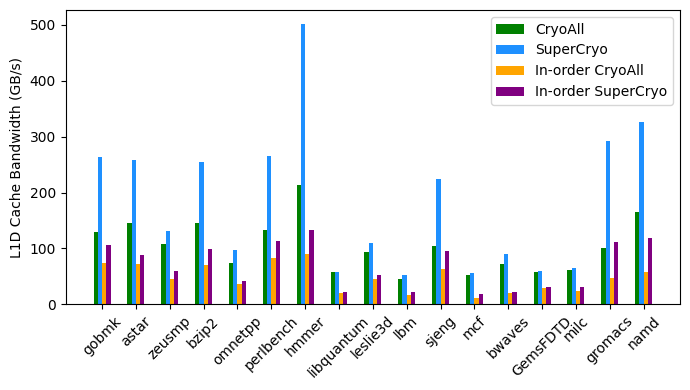

In [28]:
plot('L1D_cache_bandwidth')

     Benchmark  normalized_l3_misses_cryocorecryocache  \
0        gobmk                                0.000605   
1        astar                                0.000334   
2       zeusmp                                0.005096   
3        bzip2                                0.000087   
4      omnetpp                                0.007517   
5    perlbench                                0.000139   
6        hmmer                                0.000016   
7   libquantum                                0.024045   
8     leslie3d                                0.012209   
9          lbm                                0.019342   
10       sjeng                                0.000299   
11         mcf                                0.031232   
12      bwaves                                0.020383   
13    GemsFDTD                                0.015875   
14        milc                                0.026558   
15     gromacs                                0.000049   
16        namd

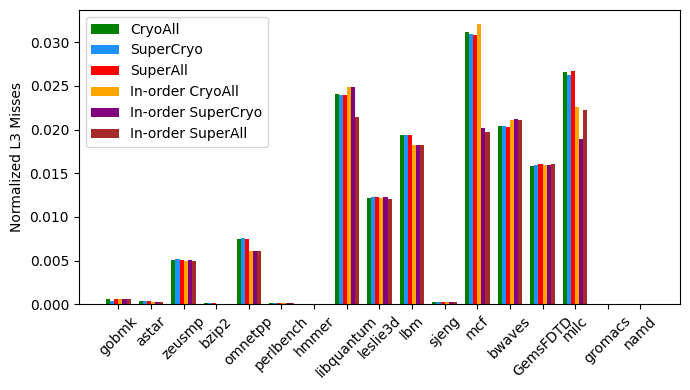

In [29]:
plot('normalized_l3_misses')

     Benchmark  normalized_cache_accesses_cryocorecryocache  \
0        gobmk                                     0.617066   
1        astar                                     0.784821   
2       zeusmp                                     0.434478   
3        bzip2                                     0.466116   
4      omnetpp                                     0.903363   
5    perlbench                                     0.783719   
6        hmmer                                     0.495242   
7   libquantum                                     0.550646   
8     leslie3d                                     0.465035   
9          lbm                                     0.385683   
10       sjeng                                     0.603253   
11         mcf                                     1.278543   
12      bwaves                                     0.466974   
13    GemsFDTD                                     0.443199   
14        milc                                     0.60

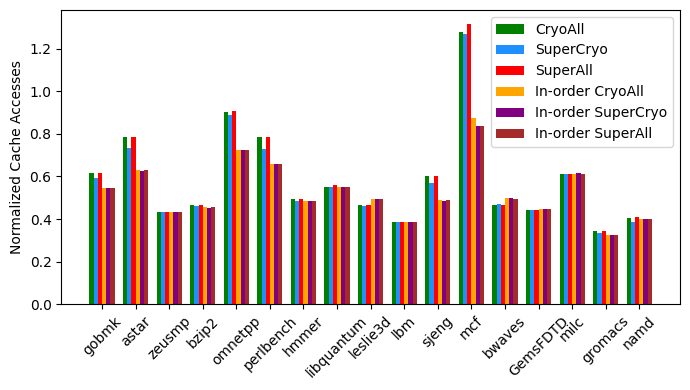

In [30]:
plot('normalized_cache_accesses')

     Benchmark  total_cache_accesses_cryocorecryocache  \
0        gobmk                            1.297629e+12   
1        astar                            8.632242e+11   
2       zeusmp                            7.024631e+11   
3        bzip2                            1.383572e+12   
4      omnetpp                            5.550263e+11   
5    perlbench                            2.048797e+12   
6        hmmer                            1.921095e+12   
7   libquantum                            1.117536e+12   
8     leslie3d                            8.940291e+11   
9          lbm                            5.231024e+11   
10       sjeng                            1.613038e+12   
11         mcf                            3.972435e+11   
12      bwaves                            7.823214e+11   
13    GemsFDTD                            5.868397e+11   
14        milc                            5.779546e+11   
15     gromacs                            5.291131e+11   
16        namd

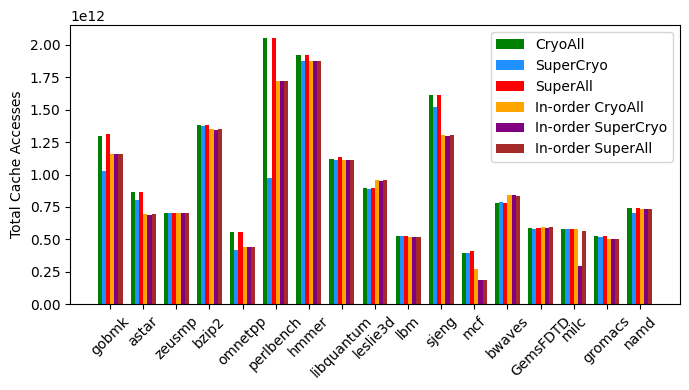

In [31]:
plot('total_cache_accesses')

     Benchmark  L1I_cache_bandwidth_cryocorecryocache  \
0        gobmk                              69.180611   
1        astar                              77.257934   
2       zeusmp                              27.377249   
3        bzip2                              72.749984   
4      omnetpp                              47.159534   
5    perlbench                              81.884738   
6        hmmer                              52.475870   
7   libquantum                              43.178395   
8     leslie3d                              22.867248   
9          lbm                              13.173912   
10       sjeng                              71.656754   
11         mcf                              31.444798   
12      bwaves                              17.603500   
13    GemsFDTD                              12.614401   
14        milc                              12.566420   
15     gromacs                              41.298265   
16        namd                 

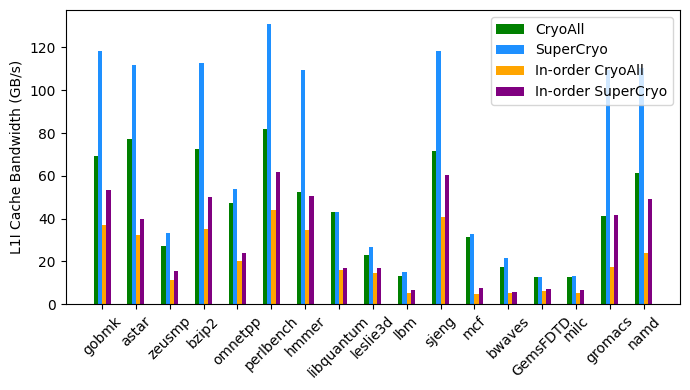

In [32]:
plot('L1I_cache_bandwidth')

     Benchmark  L2_cache_bandwidth_cryocorecryocache  \
0        gobmk                             18.137304   
1        astar                             41.871747   
2       zeusmp                             78.938472   
3        bzip2                             38.256887   
4      omnetpp                             31.983584   
5    perlbench                             13.756957   
6        hmmer                             14.540197   
7   libquantum                             39.836204   
8     leslie3d                             64.774945   
9          lbm                            103.312663   
10       sjeng                              3.556827   
11         mcf                             83.147914   
12      bwaves                             44.921769   
13    GemsFDTD                             43.129263   
14        milc                             30.231653   
15     gromacs                             41.406475   
16        namd                             44.99

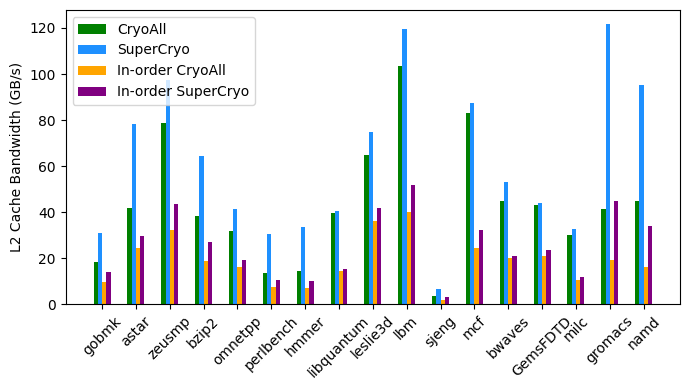

In [33]:
plot('L2_cache_bandwidth')

     Benchmark  L3_cache_bandwidth_cryocorecryocache  \
0        gobmk                              2.744337   
1        astar                             20.125351   
2       zeusmp                             19.648892   
3        bzip2                             18.394183   
4      omnetpp                             24.875044   
5    perlbench                              1.400670   
6        hmmer                              8.358202   
7   libquantum                             39.833487   
8     leslie3d                             41.844404   
9          lbm                             62.659888   
10       sjeng                              0.792161   
11         mcf                             57.418076   
12      bwaves                             39.272748   
13    GemsFDTD                             30.889806   
14        milc                             30.932066   
15     gromacs                              4.073986   
16        namd                              0.68

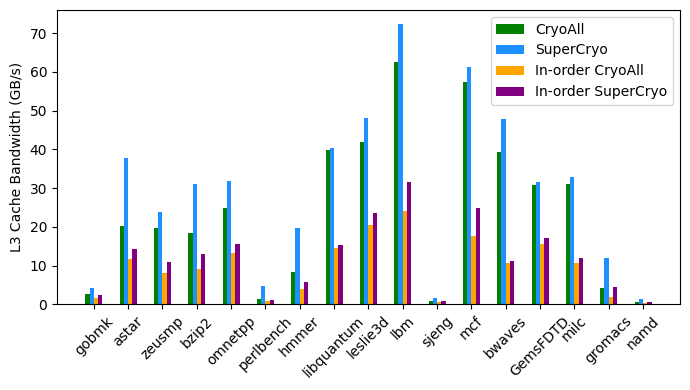

In [34]:
plot('L3_cache_bandwidth')

In [ ]:
plot('l3_cache_MPKI')